In [1]:
import pandas as pd
import numpy as np
import random
import os
# import pandas_profiling
from datetime import datetime

# Graph
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, PowerTransformer, PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.utils import resample
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import QuantileRegressor
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.cluster import KMeans
from sklearn.manifold import MDS, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, recall_score, precision_score, confusion_matrix
# from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, average_precision_score
from sklearn.metrics import calinski_harabasz_score

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import xgboost

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from tensorflow import keras
import tensorflow as tf

import statistics as st

from scipy import stats
from scipy.stats import uniform, randint, trim_mean
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import shapiro, normaltest
from statsmodels.stats.diagnostic import kstest_normal
from scipy.stats import levene
from scipy.stats import chisquare, chi2_contingency
from scipy.stats import skew, kurtosis
from scipy.stats import wilcoxon

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.sandbox.stats.runs import Runs, runstest_1samp
from statsmodels.stats.contingency_tables import mcnemar

import scikit_posthocs

import pingouin as pg
from pingouin import partial_corr

# arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from pmdarima import auto_arima

# association
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

# step 
from dmba import stepwise_selection, forward_selection, backward_elimination
from dmba import AIC_score

from sklearn.feature_selection import SelectPercentile, f_classif, SelectFromModel, RFE

# regression
# from pygam import LinearGAM, s, l
# from pygam.datasets import wage

# tresh
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
# %matplotlib notebook

In [ ]:
# pd.set_option('precision', 3)
%precision 3

In [ ]:
# 모든 행/렬 출력
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

# Update 0422

# 

# 이산형분포

### 이항분포
- 베르누이 시행을 n번 했을 때, 각 사건은 독립적으로 수행된다는 가정으로 몇번 발생되었는지

In [ ]:
from scipy.stats import norm, binom

# 정규 분포에서 192g 미만일 확률 계산
mean = 200   # 평균
std_dev = 10  # 표준편차
p_less_than_192 = norm.cdf(192, mean, std_dev)

# 이항 분포를 사용하여 40개 이상 192g 미만인 확률 계산
n = 200  # 시행 횟수
p = p_less_than_192  # 한 번의 시행에서 성공 확률
k = 40   # 최소 성공 횟수

# 최소 k 회 성공할 확률 계산
probability = 1 - binom.cdf(k-1, n, p)

print(f"192g 미만일 확률: {p_less_than_192:.4f}")
print(f"200개 중 40개 이상 192g 미만일 확률: {probability:.4f}")

rv = stats.binom(1000, 0.3) 
rv.cdf(279)

### 감마분포
- 감마분포를 따르는 확률 변수 x는 a번째 성공할 때까지의 대기 시간을 의미
### 지수분포
- 감마분포에서 알파가(a)가 1인 특수한 경우를 의미. 확률 변수 X가 첫 번쨰 성공할 떄까지의 대기 시간이라고 했을 때, 확률 변수 X는 지수분포를 따름

### 기하분포
- 이산형 분포로, 최초 성공할때까지의 확률?

### 포아송분포
- 매 사건 발생 확률이 아주 작을 때 사용
- 단위 시간에 발생할 것으로 예상하는 기대되는 평균 발생 횟수를 이용

In [ ]:
# 50분에 평균적으로 3번 휴대전화가 울린다고 하자. 한번도 울리지 않을 확률은?
rv = stats.poisson(3) # 평균 3번 발생
rv.pmf(0) # 0번 발생할 확률

In [ ]:
# 평균적으로 4%의 학생이 색맹이다. 임의로 추출된 200명의 학생 중 색맹인 학생이 10명 이하일 확률은?
mu = 8 # 단위의 평균이라 할 수 있다. 200명에 대한 평균이므로 8이다.
rv = stats.poisson(mu)
rv.cdf(10)

In [ ]:
# 이항분포로 풀면 아래와 같다.
rv = stats.binom(200, 0.04)
rv.cdf(10)

### 초기하분포
- 유한 모집단에서 비복원추출하는 경우 성공의 횟수를 X라고 할 때 호가률변수 X의 분포를 초기하 분포라고 한다
- ( 대상 * 비대상 ) / 전체 발생 가능 경우의수
$ P(X = k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}} $
- 기댓값은 E(X) = np, 표준편차는 $ \sigma(X) = \sqrt{n \frac{K}{N} \frac{N-K}{N} \frac{N-n}{N-1}}  $

ex. 어느 대학에서 전체 50명의 교수 중에서 5명을 뽑아 위원회를 구성하고자 한다. 선출과정은 무작위이다. 통계학과에 6명의 교수가 있다고 하자.
(1) 위원회에 통계학과 교수가 한 사람도 없을 확률은?

# 연속형분포

# 중심극한정리
- 중심극한정리는 독립적이고 동일하게 분포된 임의의 변수들의 평균이 샘플 크기가 충분히 크면(보통 n=30) 정규분포에 접근한다는 정리
- 샘플의 크기는 표본 평균 $ \bar{X} $을 위한 것이며, 표본 평균들(X_1, X_2, X_3..)도 어느정도 있어야 정규분포에 근사하는 것을 보여 줄 수 있다.
- 이 데이터 세트를 사용하여 여러 번의 재표본추출을 실시하고 각각의 표본 평균을 계산 및 시각화, 신뢰구간을 구할 수 있다
- 평균이 0, 표준편차가 1인 N(0, 1)데이터에서, 표본 50개를 추출 했을때의 분포는 N(0, 1/$ \sqrt{50} $) 이다

- 중심극한정리는 표본평균의 분포가, 표본 크기가 커질수록 정규분포에 접근한다고 설명. 이는 표본평균이 모평균 주위에 분포하며, 그 분산이 
n에 반비례하여 감소한다는다- .
큰 수의은 칙은 표본평균이 모평균에 수렴한다고 설명합니다. 표본 크기가 커질수록, 표본평균은 모평균과 거의 같아지고, 그 변동줄어든다니다.

## 정규분포의 가정 조사
- 정규확률점수, QQ 플롯을 이용하여 정규분포 여부를 확인할 수 있다
- 데이터가 정규분포를 따르지 않을때, log변환이나 제곱/근 변환으로 정규분포 형태로 표현 할 수 있다

In [ ]:
# 랜덤 데이터 생성
data = np.random.normal(loc=0, scale=1, size=100)

# 정규확률 그림
stats.probplot(data, dist="norm", plot=plt)
plt.title('Normal Probability Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

In [ ]:
sm.qqplot(data, line='s')
plt.show()

# 신뢰구간을 구할 때
- 표본 데이터를 바탕으로 모평균을 추정하기 위해 일반적으로 사용되는 방법은 신뢰구간을 설정하는 것이다. 표본 데이터의 평균과 표준편차를 이용하여 모평균의 신뢰구간을 계산할 수 있다. 중심극한정리를 활용하여 표본 평균이 정규분포에 근사한다고 가정하고, 표본 크기가 충분히 크다면 표준 정규분포 또는 t-분포를 사용할 수 있다. 일반적으로 표본 크기가 30 이상이면 중심극한정리에 의해 표본 평균의 분포는 정규분포에 근사하다. 그러나, **표본 크기가 작거나 모 분산이 알려져 있지 않을 때**는 t-분포를 사용하는 것이 보다 정확하다.

- 정규분포사용 $ \text{신뢰구간} = \overline{X} \pm z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}} $ / t분포사용 $ \text{신뢰구간} = \overline{X} \pm t_{\alpha/2}(n-1) \times \frac{s}{\sqrt{n}} $> 모분산의 여부(존재 시 정규분포)로 결정하는 것이 타당해 보인다. t분포를 사용할때는 모집단이 정규분포를 따른다는 가정은 중요



1. 모 분산이 알려지지 않았고 표본 크기가 작을 때(n < 30)는 t-분포 사용
2. 모 분산이 알려져 있고 표본 크기가 큰 경우는 정규 분포 사용
3. 모 분산이 알려지지 않았으나 표본 크기가 큰 경우는 t-분포를 사용하거나, 표본 표준편차로 계산된 표준오차를 사용하여 정규 분포를 적용, 하지만 실제로는 대부분 t-분포를 사용하여 보수적인 접근을 취하는 것이 일반적입니다.

In [ ]:
#신뢰구간 예제

data = np.array([163, 161, 168, 161, 157, 162, 153, 159, 164, 170, 152, 160, 157, 168, 150, 165, 156, 151, 162, 150, 156, 152, 161, 165, 168, 167, 165, 168, 159, 156])

mean = np.mean(data)
std_dev = np.std(data, ddof=1)
n = len(data)

# t 분포의 분위수 (95% 신뢰구간, 자유도 n-1)
t_critical = stats.t.ppf(1 - 0.025, df=n-1)

# 신뢰구간 계산
margin_of_error = t_critical * (std_dev / np.sqrt(n))
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print("신뢰구간:", confidence_interval)

In [ ]:
# 90% 신뢰 구간 t-test이용하여 구하기
n = 48
s_mean = 86.5
s = 7.9 

rv = stats.t(n-1)
print(s_mean + rv.ppf(0.95) * s / np.sqrt(48), s_mean - rv.ppf(0.95) * s / np.sqrt(48) )

# 중심극한정리 이용한 95% 신뢰구간
s_mean = 68
s_std = 12
n = 38

rv = stats.norm(0,1) # 표준정규분포 이용
print(s_mean + rv.ppf(0.975) * (12 / np.sqrt(38)), s_mean - rv.ppf(0.975) * (12 / np.sqrt(38)) )

rv = stats.norm(68,12 / np.sqrt(38))
print(rv.interval(0.95) )

# 중심극한정리이용 = 정규분포이용해서 100개의 표본, 표본평균 32, 표본편차 4, 99% 신뢰구간
n = 100
s_mean = 32
s = 4
rv = stats.norm(s_mean, s/np.sqrt(n))
rv.interval(0.99)

In [ ]:
## 신뢰구간 및 가설검정

data=np.array([55.9,63.8,57.2,59.8,65.7,62.7,60.8,51.3,61.8,56.0,
                66.9,56.8,66.2,64.6,59.5,63.1,60.6,62.0,59.4,67.2,
                63.6,60.5,66.8,61.8,64.8,55.8,55.7,77.1,62.1,61.0,
                58.9,60.0,66.9,61.7,60.3,51.5,67.0,60.2,56.2,59.4,
                67.9,64.9,55.7,61.4,62.6,56.4,56.4,69.4,57.6,63.8
                ])

# 기초데이터
s_mean = data.mean()
s_std = data.std(ddof=1)
n = len(data)
se = s_std / np.sqrt(n)

# 신뢰구간
rv = stats.norm(s_mean, se) 
rv.interval(0.98)

# 60초과여부 유의수준 5% 검정
u_mean = 60
z_value = (s_mean - u_mean) / se
1 - stats.norm(0,1).cdf(z_value)

# 가설검정
- 검정시 분모에 표준편차/표준오차를 쓰는 것에 대한 차이는 분자의 대상이 단일값인지 평균값인지에 따라서 이다
- 귀무가설 기각 대립 가설 채택 한다 vs 귀무가설을 기각 하지 못한다.
- **양측검정에 대한 p-value값을 구할때 cdf로 구하고 * 2를 한다. (단측검정일때는 안해도 된다)**

t분포를 이용했을 때는 t-value $ \frac{\bar{x}  - \mu} {\frac{s}{\sqrt{n}}}$를 구한 후 t분포에서 해당 값의 위치를 확인

1. 이산형
- CDF(값 x) (Cumulative Distribution Function, 누적 분포 함수) : 확률변수 X가 특정 값 x 이하가 될 확률을 나타내는 함수입니다. 모든 확률변수 값에 대해 0에서 1 사이의 값을 가지며, 확률의 누적을 나타냅니다.
- PPF(확률 x) (Percent Point Function, 백분위수 함수) 또는 Quantile Function: 주어진 누적 확률 p에 대해 해당하는 확률변수의 값을 반환하는 함수입니다. CDF의 역함수로 볼 수 있습니다.    
- PMF(값 x) (Probability Mass Function, 확률 질량 함수) : 이산 확률변수의 경우 사용되며, 확률변수 X가 특정 값 x를 취할 확률을 나타내는 함수입니다. 각 값에 대한 확률을 직접 나타내며, 모든 확률의 합은 1이 됩니다.
2. 연속형
- PDF(값 x) (Probability Density Function, 확률 밀도 함수) : PDF는 확률변수가 특정 값 근처에서 취할 확률을 설명하는 함수입니다. 이산 확률분포의 PMF와 다르게, PDF 자체의 값은 확률을 직접 나타내지 않습니다. 대신, 확률변수 X가 특정 구간내에 있을 확률은 PDF를 그 구간에서 적분하여 구할 수 있다.
- CDF(값 x (Cumulative Distribution Function, 누적 분포 함수) : 연속 확률분포에서도 CDF는 사용되며, 특정 값 x 이하가 될 확률을 나타냅니다. CDF는 PDF를 x까지 적분함으로써 구할 수 있습니다. CDF는 항상 0에서 1 사이의 값을 가지며, 확률변수의 값이 증가함에 따라 단조증가 함수의 형태를 띱니다.
- PPF(확률 x) (Percent Point Function, 백분위수 함수) 또는 Quantile Function: 주어진 누적 확률 p에 대해 해당하는 확률변수의 값을 반환하는 함수입니다. CDF의 역함수로 볼 수 있습니다. 
- Interval PPF (Percent Point Function for an interval) : Interval PPF는 주어진 확률의 구간을 만족하는 확률변수 값의 범위를 찾는 함수


# 표본크기

- 오차가 d이하로 될 확률이 최소한 100(1-a)%가 되려면, $ z_{a/2} \frac{\sigma}{\sqrt{n}} <= d  $ n에 대해 정리하면
$ n >= ( z_{a/2} \frac{\sigma}{d} )^2 $

In [ ]:
# 표준편차는 4, 평균에 대해 오차가 0.75 이하가 될 확률이 최소 90%가 되기 위한 표본 크기
rv = stats.norm(0, 1)

np.power(rv.ppf(0.95)*(4 / 0.75), 2)

In [ ]:
# 표준편차 9, 오차 1.2 이하가 될 확률이 최소 90%가 되도록하려면 필요한 표본 크기
s = 9
d = 1.2
p = 0.9
a = (1-p)
zp = rv.ppf(a/2)

math.ceil((zp * s/d) ** 2) # 반올림한다

# 비율추정
- 모비율에 대한 점 추정은 $ \hat{p} = \frac{\bar{X}}{n}$는 , 표준오차는 $ \sqrt{\frac{p(1-p)}{n}} $
- 모비율에 대한 구간 추정은 $ \text{신뢰구간} = \hat{p} \pm z \times \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}} $   
- 오차가 d이하가 될 확률이 최소한 100(1-a)%가 되기 위해서 필요한 표본크기는 $ n >= \frac{1}{4} (\frac{Z_{a/2}}{d})^2  $
> p값을 알면 1/4을 대체(p*(1-p)로) 가능하다

- 모비율 p에 대한 검정을 $  Z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1 - p_0)}{n}}}  
 $

In [ ]:
# 노동인구 500명 중 41명이 실업자로 나타났다고 하였다. 실업률 p에 대한 95% 신뢰구간을 구하여라
n = 500
X = 41
p = X/n
s = np.sqrt((p*(1-p))/n)

In [ ]:
rv= stats.norm(0,1)
p + rv.ppf(0.025) * s, p - rv.ppf(0.025) * s

In [ ]:
rv = stats.norm(X/n, s)
rv.interval(0.95)

In [ ]:
## 50개에서 31개일때, 신뢰구간
n = 50
X = 31

p = X / n
s = np.sqrt((p * (1-p)) /n)

rv = stats.norm(X/n, s)
rv.interval(0.9)

In [ ]:
## 비율 추정에서 필요한 표본숫자
rv = stats.norm(0, 1)
error_confidence = 0.95
error = 0.08
expected_p = (28/45) * (17/45) # p가 주어졌다면 p * (1 - p)을 사용하여 최소값 감소가능

if(expected_p):
    fp = expected_p
else:
    fp = 1/4
    
(rv.ppf( (1 - error_confidence) / 2) / error)**2 * fp

In [ ]:
## 비율 검정
rv = stats.norm(0, 1)
p0 = 0.75
p_hat = 0.78
n = 980

z_value = (p_hat - p0) / np.sqrt((p0 * (1 - p0)) / n)
p_value = 1 - rv.cdf(z_value) # u > u0 일떄이며, u < u0이면 그냥 cdf
p_value

# 표준편차 추론
- 모집단의 표준편차에 대한 결론을 내리는 과정
- 신뢰수준 구할 때 사용 $ \left( \sqrt{\frac{(n-1)s^2}{\chi^2_{0.975, n-1}}}, \sqrt{\frac{(n-1)s^2}{\chi^2_{0.025, n-1}}} \right) $


In [ ]:
data = [7.92, 10.29, 19.89, 17.73, 10.36, 13.50, 8.81, 6.18, 7.02, 11.71, 8.33, 9.32, 14.61] 

In [ ]:
s_std = np.std(data, ddof=1) 
s_mean = np.mean(data)
n = len(data)

In [ ]:
rv = stats.chi2(n-1)

In [ ]:
np.sqrt( ((n-1) * (s_std **2)) / rv.ppf(0.05) ) , np.sqrt( ((n-1) * (s_std **2)) / rv.ppf(0.95) ) 

In [ ]:
data = pd.DataFrame({'cd' : [21,38,12,15,14,8], 'zn' : [140,190,130,150,160,140]})

In [ ]:
s_mean = data.cd.mean()
s_std = data.cd.std(ddof=1)
n = len(data.cd)

In [ ]:
rv = stats.chi2(n-1)

In [ ]:
np.sqrt( ((n-1) * (s_std **2)) / rv.ppf(0.95) ), np.sqrt( ((n-1) * (s_std **2)) / rv.ppf(0.05) ) 

In [ ]:
# 아연 표준편차가 30 미만

In [ ]:
s_mean = data.zn.mean()
s_std = data.zn.std(ddof=1)
n = len(data.zn)

In [ ]:
np.sqrt( ((n-1) * (s_std **2)) / rv.ppf(0.95) ), np.sqrt( ((n-1) * (s_std **2)) / rv.ppf(0.05) ) 

In [ ]:
data = [175, 190, 215, 198, 184, 207, 210, 193, 196, 180]

In [ ]:
s_mean = np.mean(data)
s_std = np.std(data, ddof=1) 
n = len(data)

## t분포

In [ ]:
# 90% 신뢰구간
data = [175, 190, 215, 198, 184, 207, 210, 193, 196, 180]

In [ ]:
s_mean = np.mean(data)
s_std = np.std(data, ddof=1) 
n = len(data)

In [ ]:
rv = stats.t(n-1)
rv.ppf(0.05) * ( s_std  / (np.sqrt(n)) )

In [ ]:
# s_mean + rv.interval(0.9)[0] * ( s_std  / (np.sqrt(n)) ), s_mean + rv.interval(0.9)[1] * ( s_std  / (np.sqrt(n)) ) 아래와 같음
s_mean + rv.ppf(0.05) * ( s_std  / (np.sqrt(n)) ), s_mean - rv.ppf(0.05) * ( s_std  / (np.sqrt(n)) )

In [ ]:
# 가설검정 200이상이면 상수원으로 미적합 / 귀무가설 200이다. 대립가설 200보다 작다

In [ ]:
t_value = (s_mean - 200) / ( s_std / np.sqrt(n) )

In [ ]:
rv.cdf(t_value) #단측 검정이 그대로 사용, p값이 0.12이므로 귀무가설을 기가할 수 없다

In [ ]:
# t-분포 정규성 확인, 신뢰구간, 가설검정
data = [31,35,37,38,38,38,39,40,40,41,42,43,44,44,46,48]
s_mean = np.mean(data)
s_std = np.std(data, ddof=1) 
se=stats.sem(data)
n = len(data)

In [ ]:
stats.probplot(data, plot=plt)
plt.show()

In [ ]:
shapiro(data)

In [ ]:
t_value = (s_mean - 38) / ( s_std / np.sqrt(n) )
t_value

In [ ]:
s_mean + rv.ppf(0.025) * ( s_std  / (np.sqrt(n)) ), s_mean - rv.ppf(0.025) * ( s_std  / (np.sqrt(n)) )

In [ ]:
rv = stats.t(n-1)
1 - rv.cdf(t_value)

# 두 개의 독립 표본

## 표본의 크기가 클 때

In [ ]:
# 두개의 독립 표본이 있을떄, 차이에대한 95% 신뢰구간과 차이가 있는지 검정

In [3]:
a_mean = 453
a_std = 80
a_n = 50
b_mean = 401
b_std = 60
b_n = 100

In [4]:
# 신뢰구간
(a_mean - b_mean) -  stats .norm(0, 1).ppf(0.025) * np.sqrt(  ((a_std)**2 /a_n) + ((b_std)**2 / b_n)), (a_mean - b_mean) +  stats.norm(0, 1).ppf(0.025) * np.sqrt(  ((a_std)**2 /a_n) + ((b_std)**2 / b_n))

(77.09978578780778, 26.900214212192232)

In [5]:
z_value = (a_mean - b_mean) / np.sqrt(  ((a_std)**2 /a_n) + ((b_std)**2 / b_n))
z_value # 검종 통계량이 맞다면 N(0, 1)을 따른다. 

4.060517809103758

## 표본의 크기가 작을 때
1. 모표준편차가 같을 때 신뢰 구간 $   (\bar{X} - \bar{Y}) +- t_{a/2}(n1+n2-2) * S_{p} \sqrt{\frac{1}{n1} + \frac{1}{n2}} $
2. Sp^2인 공통분산의 합동 추정량은 $ s_p^2 = \frac{(n_1 -1)s^2_1 + (n_2 - 1)s^2_2}{n_1 + n_2 -2}  $
3. 두 모집단이 모두 정규분포를 따르고 두 모표준편차가 같을 때 가설 H0: u1 - u2 = 차이(같으면 0)에 대한 검정통계량은
   $  t = \frac{(\bar{X} - \bar{Y})-차이(같으면0 )} { S_{p} \sqrt{\frac{1}{n1} + \frac{1}{n2}}}  $ 이며 t통계의 자유도는 n1 + n2 -2인 t분포를 따른다
4. 두 모집단이 모두 정규분포를 따르고 두 모표준편차가 다를 때 가설 H0: u1 - u2 = 차이(같으면 0)에 대한 검정통계량은
   $  t = \frac{(\bar{X} - \bar{Y})-차이(같으면0 )} { \sqrt{\frac{s^2_1}{n1} + \frac{s^2_2}{n2}}}  $ 이며 t통계의 자유도는 n1 - 1 과 n2 - 1 중 작은 값인 t분포를 따른다 

> 표준편차가 같다 vs 다르다는 0.5 < s1/ s2 < 2에 따라서이다

In [6]:
# 1. 공통 분산
data1 = [8,5,7,6,9,7]
data2 = [2,6,4,7,6] 
n1 = len(data1) 
n2 = len(data2) 

std1 = np.std(data1, ddof=1)
std2 = np.std(data2, ddof=1)
sp = np.sqrt( ((n1-1)*std1**2  + (n2-1)*std2**2) / (n1 + n2 - 2) )

sp

1.699673171197595

In [7]:
# 2. 모평균의 차에 대한 신뢰구간 (모표준편차가 같을 때)

In [8]:
data1 = pd.Series([44,44,56,46,47,38,58,53,49,35,46,30,41], name='a')
data2 = pd.Series([35,47,55,29,40,39,32,41,42,57,51,39], name='b')

n1 = len(data1) 
n2 = len(data2) 

mean1 = np.mean(data1) 
mean2 = np.mean(data2) 

std1 = np.std(data1, ddof=1)
std2 = np.std(data2, ddof=1)

sp = np.sqrt( ((n1-1)*std1**2  + (n2-1)*std2**2) / (n1 + n2 - 2) )

In [9]:
(mean1 - mean2) + stats.t(n1 + n2 -2).ppf(0.025) * (sp *np.sqrt(1/n1 + 1/n2) ), (mean1 - mean2) - stats.t(n1 + n2 -2).ppf(0.025) * (sp *np.sqrt(1/n1 + 1/n2) )

(-4.020322436928242, 9.82801474462055)

In [11]:
# 3. 검정, data1이 data2보다 크다고 할 수 있는가 유의수준 0.05로 검정

In [13]:
ttest_ind(data1, data2, alternative= 'greater')

TtestResult(statistic=0.8675501422139809, pvalue=0.19730116232063577, df=23.0)

In [25]:
t = (mean1 - mean2) / (sp *np.sqrt(1/n1 + 1/n2) )
p_value = 1 - stats.t(n1+n2-2).cdf(t)
t, p_value

(0.867550142213981, 0.19730116232063566)

In [26]:
stats.t(n1+n2-2).ppf(0.95) # 참고 0.05 

1.7138715277470473

In [27]:
# 두 표준 편차가 다를 때
n1 = 13
n2 = 11 
mean1 = 2.4 
mean2 = 2.15 
s1 = 0.72 
s2 = 0.35 

In [38]:
t_value = (mean1 -mean2) / np.sqrt( (s1**2/n1) + (s2**2/n2)  )
dfree = np.where(n1 < n2, n1, n2)
p_value = 1 - stats.t(dfree-1).cdf(t_value)
t_value, p_value

(1.1068744327536062, 0.14713152863045653)

In [86]:
# 전후비교

In [79]:
data1 = np.array([70,80,72,76,76,76,72,78,82,64,74,92,74,68,84])
data2 = np.array([68,72,62,70,58,66,68,52,64,72,74,60,74,72,74])
data3 = data1-data2

In [80]:
n1 = len(data1)
n2 = len(data2) 
mean1 = np.mean(data1)
mean2 = np.mean(data2) 
s1 = np.std(data1, ddof=1)
s2 = np.std(data2, ddof=1)
s3 = np.std(data3, ddof=1)

In [85]:
t_value = (mean1- mean2) / (np.std(df.c, ddof=1) / np.sqrt(15)) 
t_value

3.105360487466108

In [83]:
# p-value
1 - stats.t(n1 - 1).cdf((mean1 - mean2) / (np.std(data3, ddof=1) / np.sqrt(15))) 

0.003874718053327064

In [84]:
# 95% 신뢰구간
(mean1-mean2) + stats.t(14).ppf(0.025) * (np.std(data3, ddof=1) / np.sqrt(15)), (mean1-mean2) - stats.t(14).ppf(0.025) * (np.std(data3, ddof=1) / np.sqrt(15))

(2.722083143052499, 14.877916856947495)

# 모비율차이에 대한 추론
1. 신뢰구간은 $ (\hat{p_1} - \hat{p_2}) +- Z_{a/2} * \sqrt{ \frac{\hat{p_1}(1-\hat{p_1})}{n_1} + \frac{\hat{p_2}(1-\hat{p_2})}{n_2}}   $
2. H0 p1=p2에 대한 검정은 $ Z = \frac{(\hat{p_1} - \hat{p_2})} {\sqrt{\hat{p}(1-\hat{p})}} \sqrt{\frac{1}{n1} + \frac{1}{n2}}  $ 이며 $ \hat{p} = \frac{X + Y}{n_1 + n_2}  $  

In [109]:
n1 = 100 
n2 = 150 
x1 = 88 
x2 = 126

p1 = x1 / n1 
p2 = x2 / n2
p = (x1 + x2) / (n1 + n2)

In [108]:
# 신뢰구간
(p1 - p2) +  stats.norm(0, 1).ppf(0.025) * np.sqrt( (p1*(1-p1))/n1 + (p2*(1-p2))/n2), (p1 - p2) - stats.norm(0, 1).ppf(0.025) * np.sqrt( (p1*(1-p1))/n1 + (p2*(1-p2))/n2)

(-0.04659403915971891, 0.12659403915971898)

In [121]:
# 검정
z_value = (p1 - p2) / (np.sqrt(p * (1-p)) * np.sqrt(1/n1 + 1/n2))
p_value = 1 - stats.norm(0, 1).cdf(z_value)
z_value, p_value

(0.8825056370227606, 0.18875171637899824)

In [123]:
# data
data1 = np.array([77, 77, 78, 78, 81, 81, 82, 82, 82, 82,
              82, 83, 83, 84, 84, 84, 84, 85, 86, 86,
              86, 86, 86, 87, 87, 87, 87, 87, 87, 87,
              89, 89, 89, 89, 89, 89, 89, 90, 90, 90,
              91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
              93, 93, 93, 93, 93, 93, 94, 94, 94, 94,
              94, 94, 94, 94, 94, 94, 94, 94, 95, 95,
              95, 95, 95, 96, 96, 96, 96, 96, 96, 97,
              97, 97, 97, 97, 97, 97, 97, 97, 98, 99,
              100, 100, 100, 100, 100, 100, 100, 100,
              100, 101, 101, 101, 101, 101, 101, 102,
              102, 102, 102, 102, 102, 103, 103, 104,
              104, 104, 105, 107])
data2 = np.array([71, 72, 73, 74, 75, 77, 78, 79, 79, 79,
              79, 80, 80, 80, 81, 81, 81, 82, 82, 82,
              82, 84, 84, 84, 84, 84, 84, 85, 85, 85,
              85, 85, 85, 86, 86, 87, 88, 90, 91, 94])

In [127]:
shapiro(data1)

ShapiroResult(statistic=0.9759647846221924, pvalue=0.03251395374536514)

In [124]:
ttest_ind(data1, data2)

TtestResult(statistic=9.130033187090332, pvalue=3.363409221146873e-16, df=156.0)

In [128]:
a_mean = np.mean(data1)
a_std = np.std(data1, ddof=1)
a_n = len(data1)
b_mean = np.mean(data2)
b_std = np.std(data2, ddof=1)
b_n = len(data2)

In [129]:
# 신뢰구간
(a_mean - b_mean) -  stats.norm(0, 1).ppf(0.025) * np.sqrt(  ((a_std)**2 /a_n) + ((b_std)**2 / b_n)), (a_mean - b_mean) +  stats.norm(0, 1).ppf(0.025) * np.sqrt(  ((a_std)**2 /a_n) + ((b_std)**2 / b_n))

(12.843496491668711, 8.870910287992293)

 # Update

# 0. 확률
- 표본 공간에서 -> 정의 된 실수값의 함수를 확률변수라고 한다. 즉, 표본공간으로 부터 가질 수 있는 실수값에 대응되는 값과 그에 대한 함수라고 할 수 있다.

1. 동전 던지기에서 앞면 또는 뒷면이 나오는 경우 표본공간을 S= {앞면, 뒷면}이라고 할 수 있다
2. 확률변수 X를 동전이 앞면이 나오면 1, 뒷면이 나오는 0라고 정의 할 수 있다 -> 동전 던지기의 확률변수
X=1일 확률은 앞면이 나올 확률이기 때문에 1/2이라고 할 수 있다.
3. 확률분포는 확률변수가 특정한 값을 가질 확률을 나타내는 함수를 의미한다. 
4. 확률분포는 확률변수의 모든 가능한 값에 대해 그 값이 나타날 확률을 나타내는 함수로서, 이산형 확률분포와 연속형 확률분포가 있다. 일반적으로 P(X= a)처럼 X가 a값일 확률이 확률분포로 표현되지만, 연속확률분포는 범위로 표현해야 한다

>> 확률변수는 함수이다.

## 0.1 이산 확률분포
- 이산 확률분포는 이산 확률변수에서 특정 값에 대한 확률을 나타내는 함수인 확률질량함수(pmf)를 통해 표현된다.

## 0.2 연속 확률분포
- 확률변수가 가질 수 있는 값의 개수가 무한한 연속형 연속형 확률변수가 가지는 확률분포

# 1. 통계
- 특정집단을 대상으로 수행한 조사나 실험을 통해 나온 결과에 대한 요약된 형태의 표현
- 데이터는 조사 또는 실험을 통해 확보되며, 총자사와 표본조사로 구분 된다
- 통계 분석의 프로세스는 아래와 같다.

```문제 정의-> 데이터수집 -> 데이터 탐색 및 전처리 -> 데이터 변환/정제 -> 통계 모형 수립 -> 모형적합 -> 모형 평가 -> 결론 도출 순으로 진행 된다.```
- 통계란 우연히 일어날 가능성은 얼마일까를 알아보는것

## 1-2 평균과 표준편차
- 통계는 분산의 마법
- 평균은 이상치에 심각한 영향을 받는다 -> 아웃라이어에 취약하다
- 분산은 평균에서 얼마만큼 퍼져 있는가에 대한 값이며, 평균에서 각 값의 차의 제곱을 합한 후 자유도(n-1)로 나눈다.
> 분자에서 모든 값을 평균값을 빼주었기 때문에 n-1로 나눈다


## 위치추정
1. 평균 : 모든 값의 총합을 개수로 나눈 값
-  기하평균 np_sqrt(a% * b % * c %, n), 시간에 따른 비율적 변화
- 조화평균 2ab / a + b -> A에서 B까지 100km를 2시간만에 왕복하는데, 갈떄는 80K의 갔다. 올때 얼마나 와야 2시간만에 올수?
2. 가중평균 : 가중치를 곱한 값의 총합을 가중치의 총합으로 나눈 값
3. 중간값 : 데이터에서 가장 가운데 위치한 값
4. 백분위수 : 전체 데이터의 P%를 아래에 두는 값
5. 가중 중간값 : 데이터를 정렬한 후, 각 가중치 값을 위에서부터 더할 때, 총합의 중간이 위치하는 데이터 값
6. 절사평균 : 정해진 개수의 극단값을 제외한 나머지 값들의 평균
7. 로버스트하다 : 극단값들에 민감하지 않다는 것을 의미
8. 특잇값 : 대부분의 값과 매우 다른 데이터 값


In [ ]:
## 절사평균
trim_mean(state.Population, 0.1) # 가장 큰 5개의 인구와 가장 작은 5개 주의 인구 제외 (trim 0.1은 각 끝에서 10%를 제외)
# 가중평균
np.average(state['Murder.Rate'], weights=state.Population)
#평균
np.mean(state['Murder.Rate'])

In [ ]:
list_values = [1,4,7,6,6,4,8,9]

val_mean = st.mean(list_values)
geom_mean = st.geometric_mean(list_values)
harm_mean = st.harmonic_mean(list_values)

print(val_mean, geom_mean, harm_mean)

## 1.4  변이 추정

1. 편차 :관측값과 위치 추정값 사이의 차이 (유의어: 오차, 잔차)
2. 분산 : 평균과의 편차를 제곱한 값들의 합을 n으로 나눈 값. n은 데이터 개수 (유의어: 평균제곱 오차)
3. 불편분산 : 평균과의 편차를 제곱한 값들의 합을 n-1으로 나눈 값.
* 표본에 대한 분산은 S, 불편분산은 s로 표현한다. 불편분산은 좋은 추정(일치성, 불편성)값이며 표본에 대한 분산은 표본 평균값과 각 값의 차이를 통해 계산되었기 때문에 자유도가 1감소로 볼 수 있다. 만약 모평균으로 뺏다면 분산구하는 방식으로 구할 수 있다
4. 표준편차 : 분산의 제곱근 
5. 평균절대편차 : 평균과의 편차의 절댓값의 평균(유의어 : l1 노름, 맨허튼 노름)
6. 중간값의 중위절대편차(MAD) : 중간값과의 편차의 절댓값의 중간값
7. 범위 : 데이터의 최댓값과 최솟값의 차이
8. 순서통계량 : 최소에서 최대까지 정렬된 데이터 값에 따른 계량형 (유의어 : 순위)
9. 백분위수 : 어떤 값들의 P퍼센트가 이 값 혹은 더 작은 값을 갖고, (100-P)퍼센트가 이 값 혹은 더 큰 값을 갖도록 하는 값(분위수)
10. 사분위범위(IQR) : 75번째 백분위수와 25번째 백분위수 사이의 차이



## 1-5 변수
- 이산형/범주형
    - 명복변수/척도 - 순위변수/척도

- 연속형

# 상관관계 분석

## 상관계수
- 각도와는 무관하다
- 상관관계는 인과관계가 아니다

|용어|내용|
|:--|:--|
|피어슨 상관관계분석|수치형 변수간의 개별 상관관계 파악|수치형 변수로 이루어진 두 변수간으 ㅣ선형적 연관성 파악|
|스피어만 서열 상관관계 분석|서열척도로 이루어진 두 변수간의 연관성 파악|
|정준상관분석|변수 그룹간의 상관관계 파악|변수들의 군집 간 선형 상관관계 파악|

In [ ]:
df1 = df[['총_매출액', '방문빈도', '구매_카테고리_수']]

In [ ]:
df1.corr(method='pearson')

In [ ]:
print(stats.pearsonr(df1.iloc[:,0], df1.iloc[:,1]))
print(stats.pearsonr(df1.iloc[:,0], df1.iloc[:,2]))
print(stats.pearsonr(df1.iloc[:,1], df1.iloc[:,2]))

## 편상관관계
- 3개 이상 변수간의 상관관계를 파악하는 다중 상관관계 분석에서, 특정 변수의 영향을 제거한 상태에서 두 변수간의 순수한 상관관계를 파악하기 위한 기법

In [ ]:
partial_corr(x='방문빈도', y='총_매출액', covar='구매_카테고리_수', data= df1)

## 정준상관분석
- 변수 그룹 간의 선형 상관 관계를 탐색하는 분석 방법

X = $ \alpha`x =  \alpha_1x_1 + ... + \alpha_px_p $

Y = $ \beta`y = \beta_1y_1 + ... +  \beta_qy_q  $

정준상관계수 = Corr(X, Y)

목적 : 
1. 정준상관계수와 정준변수를 추정 
2. 정준적재량과 교차적재량을 통해 두 변수 그룹간의 관계에 대한 변수의 영향력 확인
- 정준적재량 : 정준변수와 해당 변수를 구성하는 측정변수들 사이의 상관계수
- 교차적재량 : 정준변수와 대립하는 정준변수의 측정 변수들 사이의 상관계수


In [ ]:
df = pd.read_csv('./data/CCA.csv', encoding='CP949')

In [ ]:
df

In [ ]:
cca = CCA(n_components=1)

In [ ]:
U=df[['품질', '가격', '디자인']] #제품 만족도
V=df[['직원 서비스', '매장 시설', '고객관리']] #매장 만족도
U_c, V_c = cca.fit_transform(U, V)
U_c1 = pd.DataFrame(U_c)[0]
V_c1 = pd.DataFrame(V_c)[0]
stats.pearsonr(U_c1, V_c1)

In [ ]:
# np corrcoef는 한번에 여러개와의 상관계수 구할 수 있다. stats는 각각 구해야 한다
np.corrcoef(U_c1, U.T)[0, 1:4] # 제품만족도 정준변수와 해당 변수들간 정준적재량

In [ ]:
np.corrcoef(U_c1, V.T)[0, 1:4] # 제품만족도 정준변수와 매장만족도 변수들간 교차적재량

In [ ]:
np.corrcoef(V_c1, V.T)[0, 1:4] # 매장만족도 정준변수와 해당 변수들간 정준적재량

In [ ]:
np.corrcoef(V_c1, U.T)[0, 1:4] # 매장만족도 정준변수와 제품만족도 변수들간 교차적재량

# 데이터와 표본분포

## 2.1 임의표본추출과 표본편향

- 표본(Sample) : 더 큰 데이터 집합으로부터 얻은 부분집합
- 모집단(population : 어떤 데이터 집합을 구성하는 전체 대상 혹은 전체 집합
- N(n) : 모집단(표본)의 크기
- 임의표본추출(임의표집, 랜덤표본추출)(Random sampling) : 무작위로 표본을 추출하는 것
- 층화표본추출(층화표집)(Stratified sampling) : 모집단을 층으로 나눈 뒤, 각 층에서 무작위로 표본을 추출하는 것
- 계층(stratum) : 공통된 특징을 가진 모집단의 동종 하위 그룹(복수형은 strata로 사용)
- 단순임의표본(단순랜덤표본(simple random sample) : 모집단 층화 없이 임의표본추출로 얻은 표본
- 편향(bias) : 계통상의 오류
- 표본편향(sample bias) : 모집단을 잘못 대표하는 표본

> 편향은 측정이나 관측에 계통적 오차가 있어 전체 모집단을 제대로 대표하지 못할 경우 발생한다. 임의표본추출은 편향을 줄이고 품질 향상을 용이하게 한다

## 2.2 선택편향
- 데이터를 의식적이든 무의식적이든 선택적으로 고르는 관행을 의미
- 성능 검증을 위해 둘 이상의 홀드아웃 세트를 이용하면 이를 방지할 수 있다.


|title|description|
|:--|:--|
|선택편향|관측 데이터를 선택하는 방식 때문에 생기는 편향|
|데이터 스누핑|뭔가 흥미로운 것을 찾아 광범위하게 데이터를 살피는 것|
|방대한 검색 효과|중복 데이터 모델링이나 너무 낮은 예측변수를 고려하는 모델링에서 비롯되는 편향 혹은 비재현성|

> 가설을 구체적으로 명시하고 임의표본추출 원칙에 따라 데이터를 수집하면 편향을 피할 수 있다.

> 모든 형태의 데이터 분석은 데이터 수집/분석 프로세스에서 생기는 편향의 위험성을 늘 갖고 있다. (데이터 마이닝에서의 모델 반복 실행, 여구 시 데이터 스누핑, 흥미로운 사건의 사후 선택 등)

## 신뢰성
- 측정도구의 신뢰도를 판단하는 것으로, 대표적으로 내적일관성 분석방법이 있다
- 측정대상을 반복적으로 측정했을 때 동일한 결과가 나오는 정도를 의미
- 신뢰성은 측정도구의 안정성, 일관성, 예측가능성, 정확성, 또는 의존 가능성을 나타낸다.

## 타당성
- 측정도구의 정확성 내지는 적절성을 의미

### 내적일관성
- 하나의 개념을 측정하기 위해 여러 개의 하위 측정항목들이 존재할 경우 이들 측정 값 사이의 상관관계를 분석하여 신뢰성을 평가하는 방법
- 주요 지표로 크론바흐 알파가 사용되며, 0.6 이상이면 신뢰성 존재, 0.7이상인 경우는 높은 신뢰성
- 크론바흐 알파계수가 낮을 경우에는 내적일관성이 떨어지는 것을 의미하므로, 상관관계가 낮은 항목을 제거하여 전체적 내적일관성 향상
- 하나의 개념에 대해 신뢰성과 타당성 평가를 위한 최소 항목수는 3개
- 목적은 기존에 개발된 측정도구의 신뢰성을 평가하는 것이기도 하지만, 신뢰도를 저하시키는 하위 측정항목을 찾아 제거하는 측정도구의 전체적인 신뢰성을 높이기 위한 목저도 갖는다


In [ ]:
df = pd.read_csv('./데이터/Ashopping.csv', encoding='CP949')

In [ ]:
# 크론바흐 알파 계수가 0.811 출력,뒤에는 신뢰구간
X = df[['친절성','신속성','책임성','정확성','전문성']]
pg.cronbach_alpha(X)

In [ ]:
# 각 값이 제외될 때 계수 값이 감소한다.모두를 사용하는 것이 좋다
for i in X.columns:
    print(f'remove_{i} :',pg.cronbach_alpha(X.drop(columns=i)))

## 2.3 통계학에서의 표본분포

|title|description|
|:--|:--|
|표본 통계량|더 큰 모집단에서 추출된 표본 데이터들로부터 얻은 측정 지표|
|데이터 분포|어떤 데이터 집합에서의 각 개별 값의 도수분포|
|표본분포|여러 표본들 혹은 재표본들로부터 얻은 표본통계량의 도수분포|
|중심극한정리|표본크기가 커질수록 표본분포가 정규분포를 따르는 경향|
|표준오차|여러 표본들로부터 얻은 표본통계량의 변량|

In [ ]:
loans_incomes = pd.read_csv('./data/loans_income.csv', squeeze=True)

sample_data = pd.DataFrame(
{
    'income' : loans_incomes.sample(1000),
    'type' : 'Data'
})

sample_mean_05 = pd.DataFrame({
    'income' : [loans_incomes.sample(5).mean() for _ in range(1000)],
    'type' : 'Mean of 5'
})

sample_mean_10 = pd.DataFrame({
    'income' : [loans_incomes.sample(10).mean() for _ in range(1000)],
    'type' : 'Mean of 10'
})

sample_mean_20 = pd.DataFrame({
    'income' : [loans_incomes.sample(20).mean() for _ in range(1000)],
    'type' : 'Mean of 20'
})

results = pd.concat([sample_data,sample_mean_05,sample_mean_10,sample_mean_20])

In [ ]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect = 2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

### 2.3.1. 중심극한정리
- 모집단이 정규분포가 아니더라도, 표본크기가 충분하고 데이터가 정규성을 크게 이탈하지 않는 경우, 여러 표본에서 추출한 평균은 종모양의 정규곡선을 따른다

### 2.3.2 표준오차
- 표준오차는 통계에 대한 표본분포의 변동성을 한마디로 말해주는 단일 측정 지표이다

표준오차 = SE = $ \frac{s}{\sqrt n} $

## 2.4 부트스트랩
- 현재 있는 표본에서 추가적으로 표본을 복원추출하고 각 표본에 대한 통계량과 모델을 다시 계산
- 모델파라미터의 안정성(변동성)을 추정하거나 예측력을 높이기 위해, 부트스트랩 데이터를 가지고 모델을 돌려볼 수 있다. 
- 분류 및 회귀 트리를 사용할 때, 여러 부트스트랩 샘플을 가지고 트리를 여러 개 만든 다음 각 트리에서 나온 예측값을 평균 내는 것(분류에서는 과반수 투표)이 일반적으로 단일 트리를 사용하는 것보다 효과적이다. 이 프로세스를 배깅이라고 부른다

**크기 n의 샘플의 평균을 구하는 부트스트랩 재표본추출 알고리즘**
1. 샘플 값을 하나 뽑아서 기록하고 다시 제자리에 놓는다
2. n번 반복한다.
3. 재표본추출된 값의 평균을 기록한다.
4. 1~3단계를 R번 반복한다
5. R개의 결과를 사용한다
- a. 표준편차(표본평균의 표준오차)를 계산한다.
- b. 히스토그램 또는 상자그림을 그린다.
- c. 신뢰구간을 찾는다
> 부트스트랩은 표본통계량의 변동성을 평가하는 강력한 도구이다  <br>
> 부트스트랩은 표본분포의 수학적 근사치에 대한 엄청난 연구 없이도 다양한 환경에서 유사한 방식으로 적용될 수 있다. <br>
> 또한 수학적 근사가 어려운 통계량에 대해서도 샘플링 분포를 추정할 수 잇다. <br>
> 예측 모델을 적용할 때, 여러 부트스트랩 표본들로부터 얻은 예측값을 모아서 결론을 만드는 것(배깅)이 단일 모델을 사용하는 것보다 좋다.

In [ ]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_incomes)
    results.append(sample.median())

results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original: {loans_incomes.median()}')
print(f'bias: {results.mean() - loans_incomes.median()}')
print(f'std. error: {results.std()}')

## 2.5 신뢰구간
- 신뢰구간은 통계적 샘플링 원칙에 근거 한다

|title|description|
|:--|:--|
|신뢰수준(confidence level)|같은 모집단으로부터 같은 방식으로 얻은, 관심 통계량을 포함할 것으로 예상되는, 신뢰구간의 백분율|
|구간끝점(interval endpoint)|신뢰구간의 최상위, 최하위 끝점|

표본크기 n과 관심 있는 표본통계량이 주어졌을 때, 부트스트랩 신뢰구간을 구하는 법
1. 데이터에서 복원추출 방식으로 크기 n인 표본을 뽑는다(재표본추출)
2. 재표본추출한 표본에 대해 원하는 통계량을 기록한다.
3. 1~2단계를 R번 반복한다.
4. x% 신뢰구간을 구하기 위해, R개의 재표본 결과의 분포 양쪽 끝에서 [(100-x)/2]%만큼 잘라낸다.
5. 절단한 점들은 x% 부트스트랩 신뢰구간의 양 끝점이다.

> - 신뢰구간은 구간 범위로 추정값을 표시하는 일반적인 방법 <br>
> - 더 많은 데이터를 보유할수록 표본추정치의 변이가 줄어든다 <br>
> - 허용할 수 있는 신뢰수준이 낮을수록 신뢰구간은 좁아진다 <br>
> - 부트스트랩은 신뢰구간을 구성하는 효과적인 방법

In [ ]:
# 신뢰구간 : 실제 모수가 있을 것이라고 예상되는 구간
# 신뢰수준 : 신뢰구간에 모수가 위치할 것이라 판단되는 믿음의 정도

# 모분산을 알 때
x_mu = 8.5
x_std = 1
n = 100
x_sample_mean = 8.7

z = stats.norm()
z.isf(0.975) < ((x_sample_mean - x_mu)  / (x_std / n)) < z.isf(0.025)

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem6.csv")
sample1 = data.loc[data.gender == 'male', 'pressure']
sample2 = data.loc[data.gender != 'male', 'pressure']

print(ttest_ind(sample1,sample2, equal_var=False)) # 독립 2표본 t-검정 

# 신뢰구간 계산 
alpha = 0.05  # 95% 신뢰수준 
df = len(sample1) + len(sample2) - 2  # 자유도
t_critical = stats.t.ppf(1 - alpha / 2, df)  # 양측 검정일 때 t-분포의 임계값 
mean_diff = np.mean(sample1) - np.mean(sample2)  # 평균 차이 
std_error = np.sqrt(np.var(sample1, ddof=1) / len(sample1) + np.var(sample2, ddof=1) / len(sample2))  # 표준 오차 
margin_of_error = t_critical * std_error  # 오차 범위 
confidence_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error) 
print("신뢰구간:", confidence_interval)

## 구간추정
평균 - z * SE ~ 평균 + z * SE
*z 값은 통상 주어진다 (90% 1.64)

In [ ]:
# 어떤 대통령 후보자의 지지율을 조사하기 위해서 전국 900명을 유권자를 랜덤하게 추출하여 조사한 결과 180명이 이 후보자를 지지하는 것으로 나타났다. 이 후보자의 지지율에 대한 𝟗𝟓% 신뢰구간을 구하여라.

s_mean = 180 / 900
n = 900

rv = stats.norm()
lcl = s_mean - rv.isf(0.975) * np.sqrt(s_mean * (1-s_mean)/n) # rv.isf(0.975) 또는 rv.interval(0.95)
ucl = s_mean + rv.isf(0.975) * np.sqrt(s_mean * (1-s_mean)/n)

lcl, ucl

In [ ]:

# 공해가 심한 어느 공업도시에서 호흡기 질환자의 비율을 추정하려고 한다. 전체 시민 중에서 랜덤하게 400명을 추출하여 조사하였더니 
# 120명이 호흡기 질환을 앓고 있었다. 호흡기 질환자의 비율에 대한 95% 신뢰구간을 구하여라.

s_mean = 120 / 400
n = 400

rv = stats.norm()
lcl = s_mean - rv.isf(0.975) * np.sqrt(s_mean * (1-s_mean)/n)
ucl = s_mean + rv.isf(0.975) * np.sqrt(s_mean * (1-s_mean)/n)
ucl, lcl

## 2.6 정규분포

|title|description|
|:--|:--|
|오차|데이터 포인트의 예측값 혹은 평균 사이의 차이|
|표준화하다|평균을 빼고 표준편차로 나눈다|
|z점수|개별 데이터 포인트를 정규화한 결과|
|표준정규분포|평균=0, 표준편차=1인 정규분포|
|QQ 그림|표본분포가 특정 분포(예:정규분포|에 얼마나 가까운지를 보여주는 그림

### 2.6.1 표준정규분포와 QQ그림
- 표준정규분포는 x축의 단위가 평균의 표준편차로 표현되는 정규분포
- 데이터를 표준정규분포와 비교하려면 데이터에서 평균을 뺀 다음 표준편차로 나누면 되며 이를 정규화 또는 표준화라고 한다. 변환한 값을 z점수라고 하며, 정규분포를 z분포라고도 한다.

> 정규분포는 불확실성과 변동성에 관한 수학적 근사가 가능하도록 했다. 이는 통계의 역사적 발전에 필수적이었다. <br>
> 원시 데이터 자체는 대게 정규분포가 아니지만, 표본들의 평균과 합계, 그리고 오차는 많은 경우 정규분포를 따른다. <br>
> 데이터를 z점수로 변환하려면 데이터의 값에서 평균을 빼고 표준편차로 나눈다. 그러면 데이터를 정규분포와 비교할 수 있다.

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)
plt.show()

## 2.7 긴 꼬리 분포

|용어|내용|
|:--|:--|
|꼬리|적은 수의 극단값이 주로 존재하는, 도수분포의 길고 좁은 부분|
|왜도|분포의 한쪽 꼬리가 반대쪽 다른 꼬리보다 긴 정도|

In [ ]:
sp500_px = pd.read_csv('./data/sp500_data.csv.gz')

In [ ]:
nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(nflx, plot=ax)
plt.show()

**왜도 (Skewness)**
- 분포의 비대칭도.
- 정규분포 = 왜도 0
- 왼쪽으로 치우침(오른쪽 꼬리) = 왜도 > 0
- 오른쪽으로 치우침(왼쪽 꼬리) = 왜도 < 0

**첨도**
- 첨도(kurtosis)는 양쪽 꼬리의 두터움 정도를 나타내는 값입니다. 첨도는 큰 편차 또는 이상치(outlier)가 많을수록 큰 값을 나타낸다
- 급첨 = 첨도 > 0
- 정규분포 = 중첨 = 0
- 완첨 = 첨도 < 0

In [ ]:
rand_val = np.random.randn(100)
# sns.histplot(rand_val)
sns.distplot(rand_val)

In [ ]:
# 왜도
print(skew(rand_val))
# 첨도
print(kurtosis(rand_val, fisher=True))

## 2.8 스튜던트의 t 분포
- 정규분포와 생김새가 비슷하지만, 꼬리 부분이 약간 더 두껍고 길다.
- 표준화된 여러 통계 자료를 t 분포와 비교하여 신뢰구간을 추정할 수 있다.
- 표본평균 주위의 90% 신뢰구간은 다음과 같이 주어진다. (표본평균 +- tn-1(.05)는 (n-1)자유도를 갖는 t 분포의 양쪽 끝에서 5%를 잘라내는 t통계량

|용어|내용|
|:--|:--|
|n|표본크기|
|자유도|다른 표본크기, 통계량, 그룹의 수에 따라 t분포를 조절하는 변수|

> t 분포는 정규분포와 비슷한데 꼬리만 조금 더 두꺼운 형태 <br>
> t 분포는 표본평균, 두 표본평균 사이의 차이, 회귀 파라미터 등의 분포를 위한 기준으로 널리 사용

## 베르누이분포

## 2.9 이항분포

|용어|내용|
|:--|:--|
|시행|독립된 결과를 가져오는 하나의 사간(예:동전 던지기)|
|성공|시행에 대한 관심의 결과(유의어: 1, 즉 0에 대한 반대)|
|이항식|두 가지 결과를 갖는다(유의어: 예/아니오, 0/1, 이진)
|이항시행|두 가지 결과를 가져오는 시행(유의어: 베르누이 시행)
|이항분포|n번 시행에서 성공한 횟수에 대한 분포(유의어: 베르누이 분포)|

> 이항 결과는 무엇보다도 중요한 결정 사항들(구매/비구매, 클릭/비클릭 등)을 나타내므로 모델을 만드는 데 매우 중요<br>
> 이항시행은 두 가지 결과, 즉 하나는 확률 p, 다른 하나는 확률 (1-p)인 실험을 말한다 <br>
> n이 크고 p가 0또는 1에 너무 가깝지 않은 경우, 이항분포는 정규 분포로 근사할 수 있다


In [ ]:
stats.binom.pmf(2, n=5, p=0.1) # 5번 시행의 성공 확률이 p=0.1일 때 정확히 x = 2가 나올 확률

In [ ]:
stats.binom.cdf(2, n=5, p=0.1) # 5번 시행의 성공 확률이 p=0.1일 때 2번 이하의 성공 확률

In [ ]:
stats.binom.pmf(p=0.5, k=3, n=10) #동전 던지기 확률(0.5)를 10번 했을때, 앞면이 3번 나올 확률

In [ ]:
# 기하분포
stats.geom(p=0.5).pmf(k=3)

## 2.10 카이제곱분포
- 검정 결과가 독립성에 대한 귀무 기대값에서 벗어난 정도를 측정하는 통계량
- 관측값과 기댓값의 차이를 기댓값의 제곱근으로 나눈 값을 다시 제곱하고 모든 범주에 대해 합산한 값
- 카이제곱통계량은 관측 데이터가 특정 분포에 '적합'한 정도를 나타내며, 여러 처리('A/B/C ... 검정')의 효과가 서로 다른지 여부 결정 때 유용
- 개수 집합에 대해 카이제곱 값이 낮다는 것은 기대 분포를 거의 따르고 있음을, 카이제곱 값이 높은 것은 기대한 것과 현저하게 다르다는 것을 의미
> 카이제곱분포는 일반적으로 범주에 속하는 주제 또는 항목의 수와 관련 <br>
> 카이제곱통계는 귀무 모델의 기댓값에서 벗어난 정도를 측정

## 2.11 F 분포
- 여러 그룹에 걸쳐 서로 다른 처리를 테스트, A/B/C 검정과 유사하지만 횟수가 아닌 연속된 관측값을 처리
- 각 그룹 내 변동성(잔차 변동성)에 대한 그룹 평균 간 변동을 측정 (= 분산분석/ANOVA)
- F 통계량의 분포는 모든 그룹의 평균이 동일한 경우(즉, 귀무 모델) 무작위 순열 데이터에 의해 생성되는 모든 값의 빈도 분포
- 서로 다른 자유도에 따라 다양한 F 분포가 있다(ex. 그룹 수)
- F 통계량은 회귀 모형에 의해 설명된 변동성을 데이터 전체의 변동과 비교하기 위해 선형회귀에도 사용
- F 통계량은 회귀 및 ANOVA 루틴의 일부로 R과 파이썬에 의해 자동으로 생성된다

> F 분포는 측정된 데이터와 관련한 실험 및 선형 모델에 사용 <br>
> F 통계량은 관심 요인으로 인한 변동성과 전체 변동성을 비교

### 2.12.1 푸아송 분포 

- 시간 단위 또는 공간 단위로 표본들을 수집할 때, 그 사건들의 분포를 알려준다 <br>
(ex. 5초 동안 서버에 도착한 인터넷 트래픽을 95%의 확률로 완벽하게 처리하는 데 필요한 용량은?) 
- 푸아송 분포의 핵심 파라미터는 람다(일정 시간/공간의 구간안에서 발생한 평균 사건 수)이며, 푸아송 분포의 분산도 람다이다.


In [ ]:
stats.poisson.rvs(2, size=100)

### 2.12.2 지수분포

In [ ]:
# 주기별 평균 사건 수가 0.2인 지수분포에서 난수 100개 생성 = 분당 평균적으로 0.2회 서비스 문의 전화가 걸려오는 경우 100분 동안의 서비스 센터 문의 전화 시뮬레이션
stats.expon.rvs(scale=1/0.2, size=100)
stats.expon.rvs(scale=5, size=100) 

### 2.12.2 고장률 추정
- 시뮬레이션 또는 확률의 직접 계산을 통해 다른 가상 사건 발생률을 평가, 그 이하로 떨어지지 않을 임곗값을 추산
- 데이터가 있긴 하지만 정확하고 신뢰할 만한 발생률을 추정하기에 충분하지 않은 경우, 적합도검정을 통해 적용한 여러 발생률 중 어떤 것이 관찰된 데이터에 가장 적합한지를 알 수 있다

### 2.12.4 베이불 분포

- 많은 경우 사건 발생률이 시간에 따라 지속적으로 변하며, 그렇다면 지수분포/푸아송 분포는 용이하지 않다. (ex. 기계 고장, 시간이 지날수록 고장 위험 증가)
- 베이불 분포는 지수분포를 확장한 것으로, 형상 파라미터 B(베타)로 지정된 대로 발생률이 달라질 수 있다. 
- B > 1일 경우, 발생률은 시간이 지남에 따라 증가, B < 1이면 감소
- 베이불 분포는 사건 발생률 대신 고장 시간 분석에 사용, 두번째 인수는 구간당 사건 발생률보다는 특성 수명(=에타, 척도변수)으로 표현
- 베이불을 사용할 때는 두 변수 B(베타)와 n(에타)의 추정이 포함

In [ ]:
stats.weibull_min.rvs(1.5, scale=5000, size=100) # 1.5의 형상 파라미터(베타)와 5,000의 특성 수명을 갖는 베이불 분포에서 난수 100개 생성

# 통계적 실험과 유의성검정
- 전형적인 통계 추론 과정 : 가설을 세운다 -> 실험을 설계한다 -> 데이터를 수집한다 -> 추론 및 결론을 도출한다

# 3.1 A/B검증
- 두 가지 처리 방법, 제품, 절차 중 어느 쪽이 다른 쪽보다 더 우월하다는 것으 입장하기 위해 실험군을 두 그룹으로 나누어 진행하는 실험
- 두 가지 처리 방법 중 하나는 기준이 되는 기존 방법이거나 아예 아무런 처리도 적용하지 않는 방법
|용어|내용|
|:--|:--|
|처리|어떤 대상에 주어지는 특별한 환경이나 조건(약, 가격, 인터넷 뉴스 제목|
|처리군|특정 처리에 노출된 대상들의 집단|
|대조군|어떤 처리도 하지 않은 대상들의 집단|
|임의화(랜덤화)|처리를 적용할 대상을 임의로 결정하는 과정|
|대상|처리를 적용할 개체 대상(유의어:피실험자)|
|검정통계량|처리 효과를 측정하기 위한 지표|

## 3.2 가설검정
- 관찰된 효과가 우연에 의한 것인지 여부를 알아내는 것
- 통계 가설검정은 그룹 A와 그룹 B 사이에서 보이는 차이가 우연에 의한 것인지를 평가하기 위해 A/B 검정이나 더 나아가 그 외 여러 무작위 실험을 포함하는 분석
|용어|내용|
|:--|:--|
|귀무가설|우연 때문이라는 가설(유의어:영가설)|
|대립가설|귀무가설과의 대조(증명하고자 하는 가설)|
|일원검정|한 방향으로만 우연히 일어날 확률을 계산하는 가설검정|
|이원검정|양방향으로 우연히 일어날 확률을 계산하는 가설검정|


> 귀무가설은 우리가 관찰한 어떤 효과가 특별한 것이 아니고 우연에 의해 발생한 것이라는 개념을 구체화하는 일종의 논리적 구조 <br>
> 가설검정은 귀무가설이 사실이라고 가정하고, 영모형(확률모형)을 생성하여 관찰한 효과가 해당 모델로부터 합리적으로 나올 수 있는 결과인지 검증


## 3.3 재표본추출
- 랜덤한 변동성을 알아보자는 일반적인 목표를 가지고, 관찰된 데이터의 값에서 표본을 반복적으로 추출하는 것을 의미
- 일부 머신러닝 모델의 정확성을 평가하고 향상시키는 데이더 적용 (배깅)
- 재표본추출에는 부트스트랩과 순열검정이라는 두 가지 주요 유형 존재

|용어|내용|
|:--|:--|
|순열검정|두 개 이상의 표본을 함께 결합하여 관측값들을 무작위로(또는 전부)재표본으로 추출하는 과정 (유의어: 임의화검정, 임의순열검정, 정확검정)
|재표본추출|관측 데이터로부터 반복해서 표본추출하는 과정|
|복원/비복원| 표본을 추출할 때, 이미 한 번 뽑은 데이터를 다음번 추출을 위해 다시 제자리에 돌려 놓거나/다음 추출에서 제외하는 표본추출 방법 np.random.choid(replace=True/False)|

### 3.3.1 순열검정
- 두 개 이상의 표본이 관여되며 이들은 통상적으로 A/B 또는 기타 가설검정을 위해 사용되는 그룹
- 첫 단계는 그룹 A와 B의 결과를 하나로 합친다. 그 후 결합된 집합에서 무작위로 그룹을 뽑아 그 가설을 검정하고 서로 얼마나 다른지 살핀다

Step
1. 여러 그룹의 결과를 단일 데이터 집합으로 결합
2. 결합된 데이터를 잘 섞은 후, 그룹 A와 동일한 크기의 표본을 무작위로(비복원) 추출한다
3. 나머지 데이터에서 그룹 B와 동일한 크기의 샘플을 무작위로(비복원) 추출한다
4. C, D 등의 그룹에 대해서도 동일한 작업을 수행
5. 원래 샘플(ex. 그룹 비율의 차이)에 대해 구한 통계량 또는 추정치가 무엇이었든간에 지금 추출한 재표본에 대해 모두 다시 계산하고 기록한다.
* 여기까지가 한번의 순열 반복

6. 앞선 단계들을 R번 반복하여 검정통계량의 순열분포를 얻는다

> 순열검정에서는 여러 표본을 결합한 다음 잘 섞는다 <br>
> 그런 다음 섞인 값들을 이용해 재표본추출 과정을 거쳐, 관심 있는 표본통계량을 계산 <br>
> 이 과정을 반복하고 재표본추출한 통계를 도표화한다 <br>
> 관측된 통계량을 재표본추출한 분포와 비교하면 샘플 간에 관찰된 차이가 우연에 의한 것인지를 판단할 수 있다

## 3.3.3 예제. 웹 점착성

In [ ]:
session_times = pd.read_csv('./data/web_page_data.csv')

In [ ]:
profile = pandas_profiling.ProfileReport(session_times, title="Session time", explorative=True)

In [ ]:
session_times.head()

In [ ]:
ax = session_times.boxplot(by='Page', column='Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
plt.show()

In [ ]:
# page b와 page a의 머무는 시간 차이 평균
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
mean_b - mean_a

In [ ]:
# Permutation test example with stickiness
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()
    
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

In [ ]:
random.seed(1)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
np.mean(perm_diffs > (mean_b - mean_a))

In [ ]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

In [ ]:
stats.permutation_test((session_times[session_times.Page == 'Page A'].Time, session_times[session_times.Page == 'Page B'].Time), statistic, alternative = 'less')


### 3.3.3 전체 및 부트스트랩 순열검정
- 임의순열검정(임의화검정) 외에도 순열검정에는 전체순열검정과 부트스트랩 순열검정이 있다
- 셔플링을 많이 반복할수록, 임의순열검정 결과는 전체순열검정의 결과와 거의 유사하게 근접한다
- 전체순열검정은 영모형이 어떤 유의수준 이상으로 더 '유의미하다'라는 식의 다소 애매한 결론이 아닌 좀 더 정확한 결론을 보장하는 통계적 속성 때문에 정확검정이라고 한다

### 3.3.4 순열검정: 데이터 과학의 최종 결론
- 순열검정은 랜덤한 변이가 어떤 역할을 하는지 알아보기 위해 사용되는 휴리스틱한 절차

> 순열검정에서는 여러 표본을 결합한 다음 잘 섞는다. <br>
> 그런 다음 섞인 값들을 이용해 재표본추출 과정을 거쳐, 관심 있는 표본통계량을 계산한다. <br>
> 이 과정을 반복하고 재표본추출한 통계를 도표화한다.<br>
> 관측된 통계량을 재표본추출한 분포와 비교하면 샘플 간에 관찰된 차이가 우연에 의한 것인지를 판달 할 수 있다

### 3.4 통계적 유의성과 P값
- 통계적 유의성이란, 실험 결과가 우연히 일어난 것인지 아니면 우연히 일어날 수 없는 극단적인 것인지를 판단하는 방법
- 우연히 벌어질 수 있는 변동성의 바깥에 존재한다면 이것을 통계적으로 유의하다고 말한다

|용어|내용|
|:--|:--|
|p값| 귀무가설을 구체화한 기회 모델이 주어졌을 때 관측된 결과와 같이 특이하거나 극단적인 결과를 얻을 확률|
|알파|실제 결과가 통계적으로 의미 있는 것으로 간주되기 위해, 우연에 의한 결과가 가능해야 하는 '비정상적인'가능성의 임계 확률|
|제1종 오류| 우연에 의한 효과를 실제 효과라고 잘못 결론을 내리는 것|
|제2종 오류|실제 효과를 우연에 의한 효과라고 잘못 결론 내리는 것|

### 예제

|결과|가격A|가격B|
|:--|:--|:--|
|전환|200|182|
|전환되지 않음|23,539|22,406|

In [ ]:
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'obj differ is : {obs_pct_diff:.4f}%')

In [ ]:
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

In [ ]:
perm_diffs = [100 * perm_fun(conversion, 23739, 22588) for _ in range(1000)]

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'observed\ndiff', bbox={'facecolor':'white'})

### 3.4.1 p값
- 순열검정으로 얻은 결과 중, 관찰된 차이와 같거나 더 큰 차이를 보이는 경우 비율로 p 값을 추정할 수 있다

In [ ]:
np.mean([diff > obs_pct_diff for diff in perm_diffs])

In [ ]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
survivors

In [ ]:
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')

### 3.4.2 유의수준
- 많이 사용되는 유의수준은 5%와 1%이다. 
- p값을 통해 전달하고자 하는 의미는 결과가 우연에서 비롯된 확률이다
- 랜덤 모델이 주어졌을 때, 그 결과가 관찰된 결과보다 더 극단적일 확률


### 3.4.3 1종오류와 2종오류
- 1종 오류 : 어떤 효과가 우연히 발생한 것인데, 그것이 사실이라고 잘못 판단하는 경우
- 2종 오류 : 어떤 효과가 실제로 있는 것인데, 그것이 우연히 발생한 것이라고 잘못 판단하는 경우

### 3.4.4 데이터 과학과 p 값
- 관심 있고 유용한 모델의 결과가 일반적인 랜덤 변이의 범위 내에 있는지를 알고 싶을 때 유용한 측정 지표

> 유의성검정은 관찰된 효과가 귀무가설 모형에 대한 무작위 변이의 범위 내에 있는지 결정하는 데 사용 <br>
> p 값은 귀무가설로부터 나올 수 있는 결과가 관찰된 결과만큼 극단적으로 나타날 확률 <br>
> 유의수준(알파)이란, 귀무가설 모델에서 '비정상'이라고 판단할 임곗값을 의미

## 양측검정 vs 단측검정
- 양측검정 vs 단측검정의 차이는 대립가설의 차이
- 양측은 0보다 크거나 작은 두 가지를 모두 포함, 양쪽 꼬리의 면적의 합이 5.0%에 들어갈 만큼 작아야 한다
- 단측은 0보다 크다와 0보다 작다의 두 가지로 나누어서 볼 수 이고 어느 한쪽 꼬리의 면적이 5.0%에 들어갈 만큼 크거나 작아야 한다

# 추론통계

|모집단개수|상황|독립변수|종속변수|정규성만족|정규성불만족|등분산성|
|:--|:--|:--|:--|:--|:--|:--|
|1|모평균 비교|범주형|연속형|1sample t-test|wilcox|NA|
|2|연관|범주형|연속형|ttest_rel t-test|wilcox|NA|
|2|독립|범주형|연속형|ttest_ind t-test|mannwhitneyu|equal_var = False|

# 정규성 검정
- 표본 숫자가 30개 미만이면, 정규성 검정이 필요하며, 정규성 만족하지 못하면 윌콕슨 등 사용해야 한다
* 30 개 이상이면 중심극한정리에 의해, 표본평균은 정규분포를 따른다는 가정을 할 수 있기 때문에, 모수 검정 수행
- 정규성 검정은 아래 함수를 통해 가능하다
```
stats.shapiro(df2)
stats.normaltest(df3)
```

# 등분산성 검정

1. bartlett :데이터가 정규분포일 때 주로 사용
2. fiigner : 비모수 검정으로 정규성을 논하기 어려울 때 사용
3. levene : 데이터가 정규 분포를 따르지 않을 때 주로 사용

# 3. t-test
- 검정통계량이 귀무가설 하에서 t-분포를 따르는 통계적 가설 검정 방법으로, 어느 특정 집단의 평균의 값을 추정하거나 차이를 검정할 때 사용 할 수 있다.
- 종속변수는 평균값을 가질 수 있는 연속형 변수여야 하고, 독립변수는 범주형 변수여야 한다
- 두집단이 같은지 다른지 비교하기 위해 사용되며, 같은지 다른지는 평균값을 통해 비교한다고 할 수 있다.
- t-test는 대표적으로 3가지의 분석 방법이 있다.

ex. -> $\frac{(179.9 - 178.5)}{(7.5 / 101)}$ (179.9 - 178.5) / (7.05 / np.sqrt(101)) = 1.996 정도 나온다. t테이블을 보면 자유도 100(n-1)의 양측 검정일 때 t.975(0.05 prob)일 때 1.984이다. 1.996은 1.984보다 크므로 통계적으로 유의하다

- z-test는 z-값과 표준정규분포 이용
- t-test는 t-값과 t분포가 필요하다

**z-test vs t-test**
- z-test : 모평균 - 관측값 / 표준편차 = z value. z값을 표준정규분포표에 대응 및 확률값 추출
- t-test : Xa - Xb / s / root n = z value. z값을 표준정규분포표에 대응 및 확률값 추출

$\frac{(179.9 - 178.5)}{(7.5 / 101)}$ 

## 2.1. 일표본 T-검정 (One-sample t-test)
- 단일 모집단에서 관심이 있는 연속형 변수의 평균값을 특정 기준값과 비교한다.
- 모집단의 구성요소들이 정규분포를 이룬다는 가정
- Sample은 한개이며, 모집단의 숫자나 어떤 숫자와 비교. 중요한건 집단이 하나이다

$\frac{\overline X - u}{s \sqrt n}$ 

***단계***

1. 가설수립 : 귀무가설과 대립가설을 수립한다.
2. 유의수준(a) 설정 : 기본적으로 0.05
3. 검정통계량의 값 및 p-value(유의확률) 계산
4. 귀무가설의 기각여부 판단 및 해석

* 정규성을 만족하지 못하면 윌콕슨 부호 순위 검정 수행

### 고양이들의 평균 몸무게가 2.6kg인지 아닌지 검증. (양측 검증, 유의수준 = 0.05)

1. 가설수립
- 귀무 가설 : 고양이의 평균 몸무게는 2.6kg이다
- 대립 가설 : 고양이의 평균 몸무게는 2.6kg이 아니다

2. 정규성 검증
- 만족 못할경우 윌콕슨으로 수행

In [ ]:
cats = pd.read_csv('./data/cats.csv')

In [ ]:
cats.info()

In [ ]:
cats.describe()

In [ ]:
cats.head()

In [ ]:
cats.corr()

In [ ]:
sns.histplot(cats.Bwt)

In [ ]:
cats_Bwt_cnt = pd.value_counts(cats['Bwt'].values, sort=False)
width =0.4
plt.bar(cats_Bwt_cnt.index, cats_Bwt_cnt.values, width)
plt.title('Bwt')
plt.ylabel('Count')

In [ ]:
# 1. 정규성 검증
result_shapiro = shapiro(cats['Bwt']) 
print(result_shapiro) # 0.05보다 작으므로 정규분포를 따르지 않는다. 그렇기 때문에 윌콕슨 검정을 수행한다. 정규 분포를 따르면 t-test
print(format(result_shapiro[1], '.8f'))

In [ ]:
# 2.1 윌콕슨 
print(wilcoxon(cats['Bwt'] - 2.6, alternative='two-sided'))

# 2.2 t-test (정규성 검증을 통해, 정규성을 따른다면)
print(ttest_1samp(cats['Bwt'], popmean = 2.6))

## 2.2. 대응표본 T-검정 (Paired Sample t-test)
- 단일모집단에 대해 어떠한 처리를 가했을 때, 처리 전후에 따른 평균의 차이를 비교할때 사용
- 표본 내 개체들에 대해 두 번의 측정을 한다 (같은 집단이기 때문에 등분산성 만족)
- 모집단의 관측값이 정규성을 만족해야 한다는 가정

***단계***

1. 가설수립 : 귀무가설과 대립가설을 수립한다.
2. 유의수준(a) 설정 : 기본적으로 0.05
3. 검정통계량의 값 및 p-value(유의확률) 계산
4. 귀무가설의 기각여부 판단 및 해석

* 정규성을 만족하지 못하면 윌콕슨 부호 순위 검정 수행

### 수면제 복용이 효과가 있는지 검증. (단측 검증, 유의수준 = 0.05)

1. 가설수립
- 귀무 가설 : 수면제 복용 전과 후 수면시간 차이가 없다
- 대립 가설 : 수면제 복용 전과 후 수면시간 차이가 있다

2. 정규성 검증
- 만족 못할경우 윌콕슨으로 수행

In [ ]:
data = {'before' :[7,3,4,5,2,1,6,6,5,4],
       'after' : [8,4,5,6,2,3,6,8,6,5]}
data = pd.DataFrame(data)
data

In [ ]:
# 정규성 검증
print(shapiro(data.before), shapiro(data.after) )

In [ ]:
ttest_rel(data.before, data.after)

# 2.1 윌콕슨 
print(wilcoxon(data.after, data.before, alternative='greater'))

# 2.2 t-test (정규성 검증을 통해, 정규성을 따른다면)
print(ttest_rel(data.after, data.before, alternative='greater'))

In [ ]:
data.mean()

## 2.3. 독립표본 T-검정 (Independent Sample t-test)
- 두개의 독립된 모집단의 평균의 차이를 비교할때 사용
- 모집단, 모수, 표본이 모두 두 개씩 존재한다 (등분산성 가정을 해주어야 함)
가정.
1. 두 모집단은 정규성을 만족해야 한다.
2. 두 모집단의 분산이 서로 같아야 한다(등분산성 가정)

***단계***

1. 가설수립 : 귀무가설과 대립가설을 수립한다.
2. 유의수준(a) 설정 : 기본적으로 0.05
3. 정규성, 등분산성 가설 검정
4. 검정통계량의 값 및 p-value(유의확률) 계산
5. 귀무가설의 기각여부 판단 및 해석

### 암수 고양이의 몸무게 차이가 있다 (단측 검증, 유의수준 = 0.05)

1. 가설수립
- 귀무 가설 : 수컷과 암컷 몸무게 차이가 없다
- 대립 가설 : 수컷과 암컷 몸무게 차이가 있다

2. 정규성 검증
- 만족 못할경우 윌콕슨으로 수행


In [ ]:
cats_f = cats.loc[cats.Sex == 'F']
cats_m = cats.loc[cats.Sex != 'F']

In [ ]:
plt.bar('F', cats_f.Bwt.mean())
plt.bar('M', cats_m.Bwt.mean())

In [ ]:
# 정규성 검증
print(shapiro(cats_f.Bwt), shapiro(cats_m.Bwt))

In [ ]:
# 등분산성 검증
levene(cats_f.Bwt, cats_m.Bwt)

In [ ]:
# t-test 수행, 등분산성 만족 못하므로 equal_var = False로 수행
ttest_ind(cats_f.Bwt, cats_m.Bwt, equal_var=False)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
axs[0].hist(cats_f.Bwt)
axs[1].hist(cats_m.Bwt)

# 3. 분산분석(ANOVA)

- 세 개 이상의 집단이 같은지 다른지 알고 싶을 때 사용되며, Analysis of Variance의 약어이며 분산 분석이다
- 종속변수는 연속형이어야 하며, 독립변수는 범주형 변수여야 한다. 독립변수 개수에 따라 이월/이원/다원 배치 분석으로 나누어진다.
- 비교할 집단이 세 개 이상인 경우, t-test를 세번할수는 없다(1종오류)
- 집단의 분산과 집단내 분산의 비교라고 할 수 있다
- 종속변수는 연속형, 독립변수는 이산형/범주형 변수만 가능
- ANOVA에는 분산의 비율의 값인 F-value가 있고, F분포를 통해 확률이 유의수준보다 큰지 작은지 확인한다.

$Y_{ij} = \mu + \tau_{j} + e_{ij} $ 
- Y : 종속변수, $ \mu $: 평균, $ \tau $: 독립변수, e: 에러, j : group, i : ID

- F value = Between Variance / Within Variance
- Between Variance : (전체평균 - 그룹평균의 합) / 자유도 (그룹 - 1) (전체 평균 - 각 그룹의 평균을 각 로우별로 계산한 것의 합)
- Within Variance : 그룹평균 - 로우의 값 합 / 자유도 (데이터수 - 그룹수) (각 로우가 속한 그룹의 평균 - 각 로우 값 별로 계산한 것의 합)
* Between Variance는 그룹간의 차이를 의미하고, Within Variance는 랜돔한(무의미한) 차이를 의미한다. 즉, 그룹간 차이가 무의미한 차이보다 크면, 유의미한 차이라고 할 수 있다

- ANOVA로는 그룹들간 차이가 있다만 알 수 있다. 어떤 그룹인지 알기 위해서는 사후 검정 필요
- 사후 검정은 여러개의 t-test라고 할 수도 있다. Fisher's LSD/Bonferroni / Sheffe / Turkey / Duncan가 있으며 대부분의 경우 무엇을 써도 큰 차이는 없다.


|구분|명칭|독립변수 개수|종속변수 개수|
|:--|:--|:--|:--|
|단일변량 분산분석|일원배치 분산분석|1개|1개|
|단일변량 분산분석|이원배치 분산분석|2개|1개|
|단일변량 분산분석|다원배치 분산분석|3개 이상|1개|
|다변량 분산분석|MANOVA|1개 이상|2개 이상|
|공분산분석|ANCOVA|N|연속형 외생변수가 종속변수에 미치는 영향을 제거한 후, 순수한 집단간 종속변수의 평균 차이 비교|

|방법|설명|
|:--|:--|
|Fisher|등분산을 가정하는 방법으로 주로 귀무가설이 기각되는 경우에 사용하며 각 집단의 표본 크기가 다른 경우에도 적용기 가능하다는 장점|
|Tukey|Fisher보다 엄격한 방법으로, 검정력이 떨어지기 때문에 보통 유의수준을 0.05가 아닌 0.1이상의 큰 값으로 분석. 집단간 차이를 가장 정밀하게 감지할 수 있지만 집단별 표본 크기가 같은 경우에만 의미|
|Scheffe|일반적으로 사용되는 방법으로 다른 사후분석 방법에 비해 엄격하나, 집단별 표본 크기 다른 경우에도 사용|
|Duncan|Fisher와 마찬가지로 등분산 가정. 1종 오류 범할 가능성 높다는 단점|

## 3.1. 일원배치 분산분석(One-way Anova)
- 반응값에 대한 하나의 범주형 변수의 영향을 알아보기 위한 방법
- 모집단의 수에는 제한이 없으며, 각 표본의 수는 같지 않아도 된다.
- F 검정 통계량을 이용한다

> F 검정 통계량은 평균의 차이의 계산이 아니라 분산의 비율값이다. 즉, 분산분석에서 집단 내 분산보다 집단 간 분산이 크다면 F값은 커지고 귀무가설을 기각할 확률이 높아진다.

- 가정 : 
1. 집단의 측정치는 서로 독립적이며 정규분포를 따른다.
2. 집단 측정치의 분산은 같다 (등분산 가정)

순서
1. 가설 수립
2. 정규성 검정
3. 등분산 검정
4. f-oneway 검정
5. 사후검정

### Q. 종별로 꽃받침의 폭의 같은지 다른지
1. 가설수립
- 귀무 가설 : 세가지 종에 대해 Sepal.Width의 평균은 모두 같다
- 대립 가설 : 적어도 하나의 종에 대해 Sepal.Width의 평균의 차이가 있다

2. 정규성 검증
- 만족 못할경우 kruskal으로 수행

In [ ]:
# 정규성 검증, 만족하지 못하면 stats.kruskal()

In [ ]:
# 등분산 검증, 만족하지 못하면 pg.welck_anova()

In [233]:
from sklearn.datasets import load_iris

In [234]:
iris = load_iris()

In [235]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [236]:
iris_df['target'] = iris.target

In [237]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [238]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [239]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [240]:
iris_df['target_name'] = [iris.target_names[target] for target in iris_df.target]

In [241]:
sns.factorplot(y='sepal width (cm)', col='target_name', kind='box', data=iris_df.iloc[:,[0,1,2,3,5]])

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [ ]:
help(sns.factorplot)

In [243]:
iris_df.target_name.value_counts()

target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [244]:
setosa_sw = iris_df.loc[iris_df.target_name=='setosa', 'sepal width (cm)']
versicolor_sw = iris_df.loc[iris_df.target_name=='versicolor', 'sepal width (cm)']
virginica_sw = iris_df.loc[iris_df.target_name=='virginica', 'sepal width (cm)']

In [245]:
# 정규성 검증
print(shapiro(setosa_sw))
print(shapiro(versicolor_sw))
print(shapiro(virginica_sw))

ShapiroResult(statistic=0.971718966960907, pvalue=0.2715126574039459)
ShapiroResult(statistic=0.9741329550743103, pvalue=0.3379843533039093)
ShapiroResult(statistic=0.9673907160758972, pvalue=0.18089871108531952)


<Axes: xlabel='sepal width (cm)', ylabel='Count'>

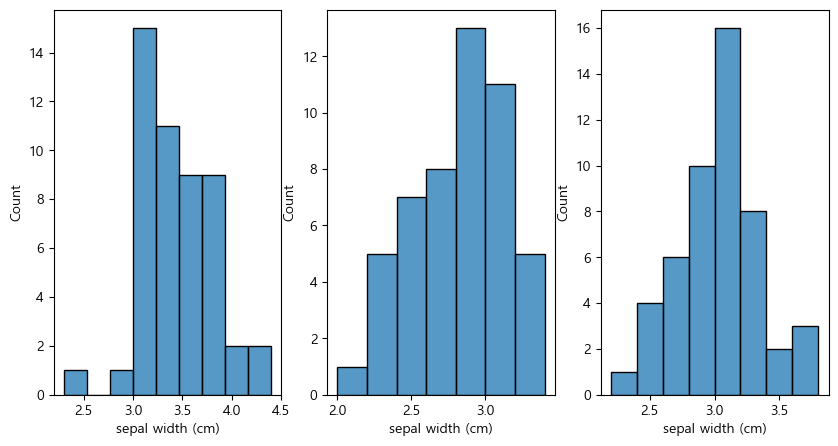

In [246]:
fig, axs = plt.subplots(1,3, figsize=(10,5))
sns.histplot(setosa_sw, ax = axs[0])
sns.histplot(versicolor_sw, ax = axs[1])
sns.histplot(virginica_sw, ax = axs[2])

In [247]:
# 만약 정규성을 만족하지 못했었다면, anova가 아닌 kruskal로 수행
stats.kruskal(setosa_sw, versicolor_sw, virginica_sw)

KruskalResult(statistic=63.571146104163795, pvalue=1.5692820940316782e-14)

In [248]:
# 등분산성 검증
levene(setosa_sw, versicolor_sw, virginica_sw)

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)

In [249]:
# 만약 등분산성을 만족하지 못헀을 경우 welch_anova 시행
# import pingouin as pg
# pg.welch_anova(data = iris_df, dv = 'sepal width (cm)', between = 'target')

In [250]:
# p value가 0.5보다 작으므로 귀무가설 기각. 즉 평균 차이가 있다
stats.f_oneway(setosa_sw, versicolor_sw, virginica_sw)

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

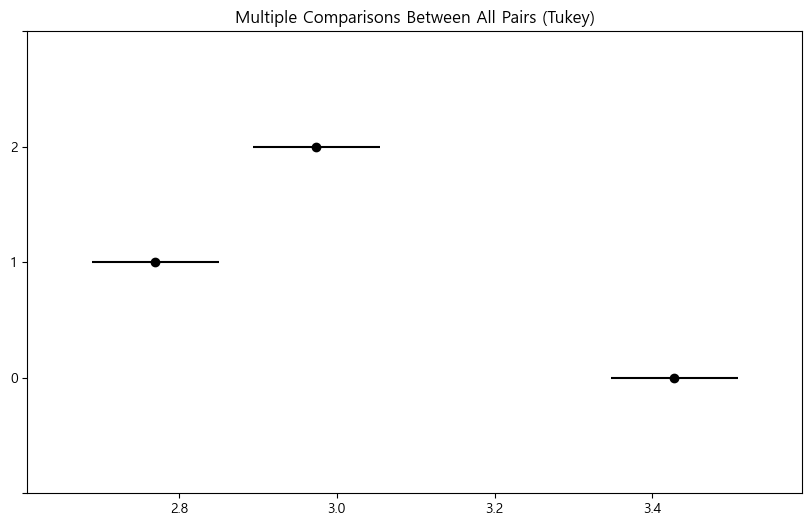

In [252]:
# 사후검증 수행
mc = MultiComparison(data= iris_df['sepal width (cm)'], groups= iris_df['target'])
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous()

In [253]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.658,0.0,-0.8189,-0.4971,True
0,2,-0.454,0.0,-0.6149,-0.2931,True
1,2,0.204,0.0088,0.0431,0.3649,True


In [ ]:
# sample 2

In [255]:
df = pd.read_csv('./data/Ashopping.csv',sep=',', encoding='CP949')
df1=df[['구매유형','총_매출액']]
sales_type_group = list()
for i in range(1, 5):
    sales_type_group.append(df1.loc[df1.구매유형 == i])
    
# 정규성 만족하지 못하면 -> 비모수 검정 수행해야 한다. 표본 샘플이 30개를 넘으므로 모수 검정 수행한다
stats.shapiro(sales_type_group[2].총_매출액) #할필요 없다 30넘으니

# 등분산성을 만족하지 않으면 welch_anova 사용
levene(sales_type_group[0].총_매출액,sales_type_group[1].총_매출액,sales_type_group[2].총_매출액, sales_type_group[3].총_매출액)
pg.welch_anova(df1, dv='총_매출액', between='구매유형')

,Source,ddof1,ddof2,F,p-unc,np2
0,구매유형,3,230.935837,88.238457,4.482842e-38,0.193409


In [256]:
scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형', sort=True)

,1,2,3,4
1,1.000000e+00,5.814165e-08,2.001393e-12,8.046353e-01
2,5.814165e-08,1.000000e+00,8.171104e-03,3.991771e-27
3,2.001393e-12,8.171104e-03,1.000000e+00,4.636896e-31
4,8.046353e-01,3.991771e-27,4.636896e-31,1.000000e+00


# 이원배치 분산분석(two-way anova)
- 독립변수가 2개이며, 독립변수는 Main effect가 있다고 하며, Two-way ANOVA에서는 Main effect가 2개
- 독립변수가 2개 + @인 ANOVA이며, @는 상호작용/Interaction
- Interaction은 한 독립변수의 main effect가 다른 독립변수의 level(=group)에 따라 원래의 linear relationhip이 non-linear하게 변하는 경우
- 총 3개의 F-value을 구해야 한다. 첫번째 독립변수, 두번째 독립변수, Interaction효과 측정을 위한 F-Value. 그러므로 3개의 Between variance가 필요하나, Within variance는 하나만 필요하다

### Q. 변속기 종류(am)와 실린더(cyl)에 따라 주행거리 평균에 유의미한 차이가 존재하는지
1. 가설수립
1.1 주효과 검정1
- 귀무 가설 : 변속기 종류에 따른 주행거리의 차이는 존재하지 않는다
- 대립 가설 : 변속기 종류에 따른 주행거리의 차이는 존재한다
1.2 주효과 검정2
- 귀무 가설 : 실린더 종류에 따른 주행거리의 차이는 존재하지 않는다
- 대립 가설 : 실린더 종류에 따른 주행거리의 차이는 존재한다
1.3 교호작용 검정
- 귀무 가설 : 변속기 종류와 실린더 개수 간에는 상호작용 효과가 없다.
- 대립 가설 : 변속기 종류와 실린더 개수 간에는 상호작용 효과가 있다.

2. 정규성 검증
- 만족 못할경우 kruskal으로 수행

In [257]:
mtcars = pd.read_csv('./data/mtcars.csv')

In [258]:
fomula = 'mpg ~ C(am) + C(cyl) + C(am):C(cyl)'
model = ols(fomula, data=mtcars).fit()
ano_table = anova_lm(model, typ=2)
ano_table

# C(am):C(cyl)의 p값이 0.05보다 크므로 교호작용 미 존재 / cly는 0.05보다 작으므로 유의하다 / am은 0.05보다 크므로 귀무가설을 기각하지 않는다

,sum_sq,df,F,PR(>F)
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am):C(cyl),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


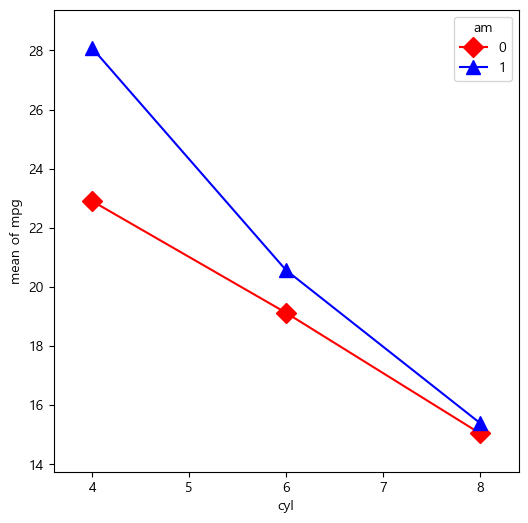

In [260]:
cyl = mtcars['cyl']
am = mtcars['am']
mpg = mtcars['mpg']

fig, ax = plt.subplots(figsize = (6, 6))
fig = interaction_plot(cyl, am, mpg, colors = ['red', 'blue'], markers=['D', '^'], ms=10, ax=ax)

# 다변량 분산분석(MANOVA)
- 중속변수가 2개 이상인 경우 집단 간의 평균 차이를 비교하기 위한 분석 기법
- 종속변수 사이에 상관관계가 존재하는지를 먼저 파악해야 한다. 상관관계가 없다면 단순 단일변량 분산분석으로 각각 분석 해도 무방, 상관관계가 존재할 경우 다변량 분산분석 진행

- 다변량분산분석 통계량
|다변량 통계치|설명|
|:--|:--|
|Pillai's Trace|집단간분산 / 총분산으로 값이 클수록 유의하다|
|Wilk's Lambda|집단내분산 / 총분산으로 값이 작을수록 유의하다|
|Hotteling's T2|집단간분산/집단내부산으로 값이 클수록 유의하다|


In [ ]:
# 귀무가설 = A 쇼핑 고객의 구매유형, 거주지역에 따른 방문빈도, 총 매출액의 차이는 없다.
# 연구가설 = A 쇼핑 고객의 구매유형, 거주지역에 따른 방문빈도, 총 매출액의 차이는 있다.

In [261]:
from statsmodels.multivariate.manova import MANOVA

In [262]:
df = pd.read_csv('./data/Ashopping.csv',sep=',', encoding='CP949')
df1=df[['총_매출액','방문빈도','구매유형','거주지역']]
pd.options.display.float_format = '{:.3f}'.format

In [263]:
stats.pearsonr(df1.총_매출액, df1.방문빈도)

PearsonRResult(statistic=0.6311706453193395, pvalue=3.05196044968719e-112)

In [264]:
print(MANOVA.from_formula('총_매출액 + 방문빈도  ~ C(구매유형) + C(거주지역)', data=df1).mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
         Intercept        Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.9979 2.0000 989.0000  1.0577 0.3476
           Pillai's trace 0.0021 2.0000 989.0000  1.0577 0.3476
   Hotelling-Lawley trace 0.0021 2.0000 989.0000  1.0577 0.3476
      Roy's greatest root 0.0021 2.0000 989.0000  1.0577 0.3476
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
        C(구매유형)         Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.4423 6.0000 1978.0000 166.0295 0.0000
         Pillai's trace 0.6365 6.0000 1980.0000 154.0509 0.

In [265]:
df1.구매유형 = df1.구매유형.astype('string')
df1.거주지역 = df1.거주지역.astype('string')

In [267]:
scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형')
scikit_posthocs.posthoc_scheffe(df1, val_col='방문빈도', group_col='구매유형')

,4,2,1,3
4,1.000,0.000,0.030,0.998
2,0.000,1.000,0.000,0.000
1,0.030,0.000,1.000,0.075
3,0.998,0.000,0.075,1.000


In [268]:
scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형')
scikit_posthocs.posthoc_scheffe(df1, val_col='방문빈도', group_col='구매유형')

,4,2,1,3
4,1.000,0.000,0.030,0.998
2,0.000,1.000,0.000,0.000
1,0.030,0.000,1.000,0.075
3,0.998,0.000,0.075,1.000


In [269]:
pd.pivot_table(data=df1, index='구매유형', columns='거주지역', aggfunc='mean')

방문빈도                                                 총_매출액              \
거주지역     1      2      3      4      5      6      7           1           2   
구매유형                                                                           
1      NaN  8.000  8.667 10.818 10.222  9.667 10.000         NaN 3281350.000   
2      NaN    NaN 29.143 42.312 39.022 48.212 58.845         NaN         NaN   
3    7.750  5.000  7.929 11.903 15.350 20.438 40.765 4906400.000 3215055.000   
4      NaN 12.778 12.485 17.277 18.000 18.768 19.966         NaN 4034175.556   

                                                                     
거주지역           3           4            5            6            7  
구매유형                                                                 
1    3002825.000 3041428.182  3637031.667  3712146.667  3864880.000  
2    4215648.571 8278686.562  6590330.674 10226770.763 13513839.437  
3    6809777.143 7965439.677 11046081.250 13768678.750 25451441.176  
4    3720989.697 4229915.000  4272964.468  4749139.200  5138468.276

# 공분산분석
- 일반적인 분산분석에서 종속변수에 영향을 줄 수 있는 연속형 외생변수의 효과를 제거하고, 순수하게 집단 간 종속변수의 평균 차이를 분석하는데 사용하는 분산분석의 일종
- (분산분석 관점) 연속형 독립변수인 공변량(여기서는 양적인 독립변수)을 통제하고, 명목형 독립변수 요인의 순수한 효과를 분석하는 것
- (회귀분석 관점) 단순히 연속형 변수(종속)만 고려하는 경우 생겨날 수 있는 문제점 보완의 측면
- 순수한 독립변수의 효과만을 보고자 하는 분석기법

In [ ]:
# 귀무가설 = 방문빈도를 통제한 상황에서 거주지역에 따른 총 매출액은 차이가 없다
# 연구가설 = 방문빈도를 통제한 상황에서 거주지역에 따른 총 매출액은 차이가 있다

In [270]:
df1=df[['총_매출액','방문빈도','거주지역']]

#2. 공분산분석
pg.ancova(dv='총_매출액', between='거주지역',covar='방문빈도', data=df1)

,Source,SS,DF,F,p-unc,np2
0,거주지역,696696841275019.125,6,4.046,0.001,0.024
1,방문빈도,13701443685723058.000,1,477.393,0.000,0.325
2,Residual,28470960329516344.000,992,NaN,NaN,NaN


In [ ]:
#3. 일원분산분석
pg.anova(dv='총_매출액', between='거주지역', data=df1)

# 교차분석(카이제곱 검정)
- 변수가 명목척도 일때, 자료의 값은 개수 이여야 한다
- t-test나 ANOVA의 경우 둘/셋 이상의 집단이 같은지 라면, 카이제곱은 변수가 한개라면 변수내 그룹간의 비율이 같은지 다른지, 변수가 두 개인 경우 변수 사이의 연관성이 있는지 없는지를 판별
- 카이제곱 값($\chi$)은 관찰빈도와 기대빈도로 구해지며, 관찰 빈도는 자료에서 주어지고, 기대 빈도(두 변수가 독립적일 때 이론적으로 기대할 수 있는 빈도분포)는 구해야 한다.

$ \chi^{2}값 = \sum \frac{(O-E)^{2}}{E} $ 
(O : 관찰빈도, E : 기대빈도)

## 카이제곱 검정 종류

|카이제곱 검정 종류|분석목적|함수|
|:--|:--|:--|
|적합도 검정 비교|관측결과가 특정한 분포로부터의 생성된 관측 값인지를 검정|stats.chisquare|
|독립성 검정|두 범주형 변수 사이의 연관성이 있는지를 검정(ex. 직업유형과 선호상품 관계)|stats.chi2_contingency|
|동질성 검정|다른 두 모집단으로부터 생성된 두 표본의 분포가 동일한지 검정 (예: 서울과 부산지역 고객들의 선호 품목 유사 검정|상동|
|맥니마 검정|2*2 테이블일 때 적용 가능 방법으로 동일 사람에 대해 두번 측정과 같은 before after|statsmodels.stats.contigency_tables.mcnemar|


## 카이제곱 검정 방법

1. 적합성 검정 : 각 범주에 따른 데이터의 빈도분포가 이론적으로 기대하는 분포를 따르는지 검정
(ex. 주사위를 굴렸을 때, 각 주사위의 값이 1/6이 맞는지 검정)

n개의 변수에 대한 비율을 각각 P1, P2, P3... Pn 으로 정의할 때, 

- 귀무가설 : 각 비율간 차이가 없다 또는 일정 비율이 기대된다
- 대립가설 : 적어도 하나는 서로 다르다 or 적어도 하나는 기대 비율과 다르다

2. 독립성 검정 : 모집단이 두 개의 변수 A, B에 의해 범주화되었을 때, 이 두 변수들 사이의 관계가 독립인지 아닌지를 검정
(ex. 환자의 비만유무와 대사성 질환의 유무가 주어졌을 때, 비만에 따른 질환 비율에 차이가 존재하는지 검정)

- 귀무가설 : classs 변수와 survived 변수는 서로 독립이다
- 대립가설 : classs 변수와 survived 변수는 서로 독립이 아니다

3. 동질성 검정 : 모집단이 임의의 변수에 따라 R개의 속성으로 범주화되었을 때, R개의 부분 모집단에서 추출한 표본이 C개의 범주화된 집단의 분포가 서로 동일한지 검정 (독립성 검정과 계산법과 검정 방법은 같다)

- 귀무가설 : classs의 분포는 survived와 관계없이 동일하다.
- 대립가설 : classs의 분포는 survived와 관계없이 동일하지 않다.


### Q. titanic 데이터에서 sex 변수에 대한 분할표를 생성하고 아래의 가설에 대한 적합도 검정 
1. 귀무가설 : 생존자 중 남자의 비율이 50% 여자의 비율이 50%이다
2. 대립가설 : 생존자 중 남자의 비율이 50% 여자의 비율이 50%라고 할 수 없다

In [155]:
titanic = pd.read_csv('./data/titanic.csv')

In [156]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton


In [157]:
survied = titanic.loc[titanic.survived == 1].sex

In [158]:
table = survied.value_counts()
table

sex
female    233
male      109
Name: count, dtype: int64

In [159]:
# 카이제곱 통계량은 약44.96, p-value는 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 즉, 50:50이라고 할 수 없다
chi = chisquare(table, f_exp= [171, 171])
chi

Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)

### Q. titanic 데이터에서 좌석등급과 생존 여부가 서로 독립인지 검정
1. 귀무가설 : classs 변수와 survived 변수는 서로 독립이다
2. 대립가설 : classs 변수와 survived 변수는 서로 독립이 아니다

In [ ]:
titanic.pclass.value_counts()

In [ ]:
crosstb = pd.crosstab(titanic.pclass, titanic.survived)

In [ ]:
pd.crosstab(index = titanic['survived'], columns=titanic['pclass'])

In [ ]:
crosstb

In [ ]:
# 카이제곱 통계량, p-value, 자유도, 기대빈도
# p-value가 지정한 유의수준(0.05)보다 낮으므로 독립이 아니다
chi2_contingency(crosstb)

## 카이제곱 종류
**일원 카이제곱 검정**
- 변수가 1개라는 의미이며, 한 개의 변수가 명목 척도 이다.변수는 2개 이상의 범주를 갖는다

**이원 카이제곱 검정**
- 변수가 2개라는 의미이며, 두 개의 변수가 명목 척도 이다.각 변수는 2개 이상의 범주를 갖는다
- 가장 단순한 형태는 2 X 2 분석이며, 이 때 사용하는 것이 분할표(contingency table) 이다
- 분할표를 통해 이원 카이제곱 검정 목적은 행과 열 사이에 어떠한 연관성이 있는지 확인하는 것이다 (상관관계다. 인과관계x)

통계적 가설:
- H_{0} : 연관성이 없다 (상호 독립이다)
- H_{1} : 연관성이 있다.

E = $ \frac{(Row Total) * (ColumnTotal)}{GrandTotal} = \frac{(행합계) * (열합계)}{총합계}$

## 카이제곱 검정 한계점/전제조건
- 독립성 : 각 범주가 서로 배타적이여야 하며, 한 대상이 하나 이상의 범주에 들어갈 수 없다
- 기대빈도 : 각 셀의 기대빈도가 5 이상이어야 하며, 경우에 따라 범주를 합쳐야 한다. 만약 범주를 합칠 수 없다면,Fisher's exact test을 하거나 likeihood ratio test(G-test)를 해야 한다
- 만약 df가 1이라면 : 일원 카이제곱 검정의 경우 범주가 2개이거나, 이원 카이제곱 검정에서 2*2인 경우, 비연속성의 조건부 확률을 연속성의 카이제곱 분포에 적용함으로써 문제 발생
- 일원 카이제곱 검정의 경우 무조건 연속성 보정을 하는 Yate's correction또는 카이제곱 continuity correction을 사용해야 한다.
- 이원 카이제곱 검정의 2*2인 경우 : 카이제곱 test의 결과와 Yate's correction의 결과 다를 때는 Fisher's  exact test 사용

상대 위험도(relative risk)
- 상대위험도는 두 확률의 차이인 P1 - P2가 아니라 P1 * P2로 나타냄

- 교차비/오즈비
오즈란? : Odds = p / 1-p (p : 어떤 사건이 발생할 확률)

ex. 
- p가 1/2 이면, odds = 1/2 / 1/2 = 1
- p가 3/4 이면, odds = 3/4 / 1/4 = 3

In [151]:
clicked = [14,8,12]
no_clicked = [986, 992, 988]
sep = ['A','B','C']

df = pd.DataFrame([clicked,no_clicked], columns=[sep])
df.index = ['click','not_click']
df

,A,B,C
click,14,8,12
not_click,986,992,988


In [152]:
df_avg = pd.DataFrame([[34 / 3] * 3, [2966/3] * 3], columns=sep)
df_avg.index = ['click','not_click']
df_avg

,A,B,C
click,11.333333,11.333333,11.333333
not_click,988.666667,988.666667,988.666667


In [153]:
stats.chi2_contingency(df.values, correction=False)

Chi2ContingencyResult(statistic=1.6659394708658917, pvalue=0.4347562562343731, dof=2, expected_freq=array([[ 11.33333333,  11.33333333,  11.33333333],
       [988.66666667, 988.66666667, 988.66666667]]))

In [154]:
((1.28 ** 2) * 0.5 * 0.5) / (0.05 ** 2)

163.83999999999997

In [160]:
# test

In [164]:
df = pd.read_csv('./data/Ashopping.csv', encoding='euc-kr')

In [166]:
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6


In [189]:
df_cross = pd.crosstab(df['구매유형'], df['클레임접수여부'], margins=True).T

In [190]:
df_cross

구매유형,1,2,3,4,All
클레임접수여부,,,,,
0,24,197,57,263,541
1,19,120,87,233,459
All,43,317,144,496,1000


In [196]:
ob = df_cross.values[1, :4]
pr = np.array([0.1, 0.3, 0.2, 0.4])
n = df_cross.values[1, 4]

In [198]:
e = n*pr

In [201]:
stats.chisquare(ob, e)

Power_divergenceResult(statistic=31.582788671023955, pvalue=6.407672361002909e-07)

In [202]:
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [204]:
df_cross = pd.crosstab(df.성별, df.클레임접수여부)

In [205]:
df_cross

클레임접수여부,0,1
성별,,
0,139,10
1,402,449


In [206]:
stats.chi2_contingency(df_cross)

Chi2ContingencyResult(statistic=106.43790651350751, pvalue=5.911607287197053e-25, dof=1, expected_freq=array([[ 80.609,  68.391],
       [460.391, 390.609]]))

In [207]:
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [217]:
df['고객_나이범위'] = df['고객_나이대'].apply(lambda x: 1 if(x < 5) else 2)

In [225]:
df1 = df.loc[df.고객_나이범위 == 1]
df2 = df.loc[df.고객_나이범위 == 2]

In [228]:
df1_sample =df1.sample(200, random_state =29)
df2_sample =df2.sample(200, random_state =29)
df3 = pd.concat([df1_sample, df2_sample])

In [230]:
df_cross = pd.crosstab(df3.고객_나이범위, df3.구매유형)

In [231]:
df_cross

구매유형,1,2,3,4
고객_나이범위,,,,
1,8,64,19,109
2,9,63,33,95


In [232]:
stats.chi2_contingency(df_cross)

Chi2ContingencyResult(statistic=4.7967126281160555, pvalue=0.18730257758350136, dof=3, expected_freq=array([[  8.5,  63.5,  26. , 102. ],
       [  8.5,  63.5,  26. , 102. ]]))

In [161]:
# test

## 3.11 검정력과 표본크기

### sample size formula
### $ \frac{(Z-score)2 * StdDev * (1-StdDev)}{(margin of error)2} $
(ex. 95%, confidence lv 0.5, standard devrition and a margin of error of +/-5%)
((1.96)2 * 0.5(.05)) / (0.5)2

|용어|내용|
|:--|:--|
|효과크기|클릭률의 20% 향상과 같이 통계 검정을 통해 판단할 수 있는 효과의 최소 크기|
|검정력|주어진 표본크기로 주어진 효과크기를 알아낼 확률|
|유의수준|검증 시 사용할 통계 유의수준|

> 통계 검정을 수행하기 앞서, 어느 정도의 표본크기가 필요한지 미리 생각할 필요가 있다<br>
> 알아내고자 하는 효과의 최소 크기를 지정해야 한다<br>
> 또한 효과크기를 알아내기 위해 요구되는 확률을 지정해야 한다<br>
> 마지막으로, 수행할 가설검정에 필요한 유의수준을 정해야 한다

- 검정력 또는 표본크기와 관련 된 중요한 4가지 요소가 있으며, 이 중 3가지를 정하면 나머지 하나를 알 수 있다
1. 표본크기
2. 탐지하고자 하는 효과크기
3. 가설검정을 위한 유의수준
4. 검정력

> 통계학에서는 최소 표본크기를 30명으로 보는 것이 가장 일반적이다. 30명을 기준으로 삼는 가장 큰 이유는 바로 통계학의 중심극한정리 이론 때문이다.

In [ ]:
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011) # 효과 크기를 계산, 기존 1.1$수준에서 1.21%를 원한다고 가정
analysis = sm.stats.TTestPower()
result = analysis.solve_power(effect_size = effect_size, alpha=0.05, power=0.8, alternative='larger') 

result

# 모비율 추정에서 표본크기 결정
## 표본추출 전 실험의 목적에 맞는 표본크기를 결정하는 법
- $ \hat{p}의 100(1-\alpha)$% 오차한계 : $ Z_{\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} $
- 100(1-@)% 오차한계를 d(신뢰구간의 길이를 2d) 이하로 하기 위한 최소의 표본 크기는?
- -> $ Z_{\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} $ <= d -> n >= $\hat{p}(1-\hat{p})(\frac{Z_\alpha/2}{d})^2$ 인 최소의 정수

## p에 대한 정보가 없는 경우
- n >= 1/4($\frac{Z_{\alpha/2}}{d})^2$

In [ ]:
# 사전 임상실험 결과 치료율이 60%이다. 치료율 추정의 95% 오차한계 3% 이내가 되기 위한 표본 크기
p = 0.6
d = 0.03
interval = 0.95

rv = stats.norm()
z = rv.interval(0.95)
p*(1-p)*((z[1]/d)**2)

In [ ]:
# 공장 추정 불량륭 90% 오차한계 5%이하 최소 표본 사이즈
p = 0.9
d= 0.05
interval = 0.95
rv = stats.norm()
z = rv.interval(0.95)
p*(1-p)*((z[1]/d)**2)

In [ ]:
# 어느 대통령 후보의 지지율 𝒑를 추정하려고 한다. 지지율 추정의 95%의 오차한계가 5% 이하가 되도록 하려면 필요한 표본크기가 얼마인가?
d = 0.05
1/4 * ((z[1]/d)**2)

<h1 style="color:red">정리하면</h1>
- 목표 표본크기는 오차한계와 신뢰수준을 결정함으로써 결정한다. 
- d=표본평균 - 모평균 , 신뢰 수준 95%라고 가정했을 때,


$ \frac{d}{\sigma/\sqrt{n}} = z0.025 =1.96 $

d = 1.96 * $ \frac{\sigma}{\sqrt{n}}$

n = $\frac{(1.96\sigma)^2}{d^2} $

ex. 표준편차 $ \sigma $는 560으로 알려져있고, 신뢰수준 95%로 구매의향 가격의 허용오차를 100원 이내로 제어하고 싶다면, 최소한 표본크기가 121명 이상인 표본을 추출해야 한다

In [ ]:
((1.96 * 560) **  2) / (100 ** 2)

# 선형 회귀분석
- 머신러닝의 회귀 분석은 예측의 성공 확률을 높이는데 목적이 있다면, 통계분석 방법은 정해진 분포나 가정을 통해 실패 확률을 줄이고, 원인을 찾는 데에 목적이 있다
- 잔차의 합이 최소가 되는 최소제곱법을 사용한다
- 평가지표는 $R^2$(0~1값)와 RMSE가 주로 사용되며, 하나의 선이 전체 데이터를 얼마나 잘 설명할 수 있는가가 주요 평가 지표라고 할 수 있다
- 회귀분석을 위한 전제조건
1. (선형성) 독립변수와 종속변수 간에는 선형관계가 존재한다
2. (등분산성) 잔차들은 동일한 분산을 갖는다.
3. (독립성) 잔차들은 서로 독립이다
4. (정규성) 잔차는 평균이 0이고 분산이 $ \sigma^2$인 정규분포를 따른다



1. 귀무가설 : 회귀 모델은 통계적으로 유의하지 않다.
2. 대립가설 : 회귀 모델은 통계적으로 유의하다

In [ ]:
house = pd.read_csv('data/kc_house_data.csv')

In [ ]:
house.info()

In [ ]:
house.describe()

In [ ]:
house.head()

In [ ]:
plt.rc('figure', figsize = (10,10))
sns.heatmap(house.corr(), annot=True)

In [ ]:
plt.xlim(100000, 1000000)
sns.histplot(house.price)

In [ ]:
house['waterfront'] = house.waterfront.apply(lambda x: 1 if x == 'standard' else 0)
house_df = house

In [ ]:
house_df_X = house_df.iloc[:,1:]
house_df_y = house_df.iloc[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(house_df_X, house_df_y)

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
# fomula = 'price ~ bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + sqft_living15 + sqft_lot15'
fomula = 'price ~ sqft_living'
lr = ols(fomula, data=house_df).fit()
lr.summary()

In [ ]:
# when use statsmodel api, we can use both ways 1. using formula or 2. using OLS or Logit function
X = house_df[['sqft_living']]
y = house_df[['price']]
model = sm.OLS(X, y).fit()
model.summary()

In [ ]:
X = house[['sqft_living']]
y = house['price']

In [ ]:
result = lr.predict(X)

In [ ]:
plt.scatter(X, y)
plt.plot(X, result, color='red')

In [ ]:
# p 값(Prob)가 0.05보다 작으므로 회귀식은 유의하다. 회귀식 계수는 sqtf_living * 280.6236 - 43580 이며, r2 score는 0.493이므로 설명력이 낮다

lr.summary()

In [138]:
# 회귀식
height = np.array([181, 161, 170, 160, 158, 168, 162, 179, 183, 178,
                   171, 177, 163, 158, 160, 160, 158, 173, 160, 163,
                   167, 165, 163, 173, 178, 170, 167, 177, 175, 169,
                   152, 158, 160, 160, 159, 180, 169, 162, 178, 173,
                   173, 171, 171, 170, 160, 167, 168, 166, 164, 173,
                   180])
weight = np.array([78, 49, 52, 53, 50, 57, 53, 54, 71, 73,
                   55, 73, 51, 53, 65, 48, 59, 64, 48, 53,
                   78, 45, 56, 70, 68, 59, 55, 64, 59, 55,
                   38, 45, 50, 46, 50, 63, 71, 52, 74, 52,
                   61, 65, 68, 57, 47, 48, 58, 59, 55, 74,
                   74])

In [131]:
data = pd.DataFrame({'height': height, 'weight' : weight})

In [135]:
ols_fit = smf.ols('weight ~ height', data = data).fit()

In [137]:
ols_fit.summary()
ols_fit.conf_int(0.95)

,0,1
Intercept,-102.100036,-99.463933
height,0.940045,0.955733


## 다중공선성
- 단순 선형 회귀분석과 다중 선형회귀분석 차이점은 독립변수의 수이다. 독립 변수의 수가 두 개 이상일 경우 필수적으로 다중공선성 문제(독립변수들 간에 강한 상관관계가 나타나는 문제)를 해결해야 한다
- 다중공선성의 문제가 존재하면 정확한 회귀계수 추정이 어렵기 때문에, 하나의 변수를 제거해주거나 해당 변수에 패널티(리지, 라쏘)를 주어 모델에 미치는 영향력을 줄여야 한다

**다중공선성 진단 방법**
1. 독립변수들 간의 상관계수를 구하고 0.9 이상이면 다중공선성 문제가 있다고 할 수 있다
2. 다중공선성이 의심되는 두 독립변수의 회귀분석으로 허용 오차(1-$R^2$)를 구했을 때 0.1이하이면 다중공선성 문제가 있다고 할 수 있다.
3. VIF(variance inflation factor)의 값이 10 이상이면 다중공선성이 존재할 것으로 예상

VIF = $\frac{1}{1-R^2}$

## 변수선택법
- 독립변수의 수가 많으면 데이터 관리 및 분석이 어려움이 생긴다. 유의미한 독립변수만을 선택하여 최적의 회귀방정식을 도출
- 모델의 유의성 판단의 근거로 삼았던 F통계량이나, AIC와 같은 기준값을 근거로 변수를 선택한다

### 4.2.4 모형 선택 및 단계적 회귀
- 회귀식 처리를 위해서는 범주형 혹은 불 변수를 숫자로 변환해야 한다
- 더 많은 변수가 있다고 모델이 좋아지는 것은 아니다. 모든 것이 동일한 조건에서는, 복잡한 모델보다는 단순한 모델을 우선 사용해야 한다
- 변수를 추가할수록 학습 데이터에 대해 항상 RMSE는 감소하고 R^2은 증가한다. -> adj R^2로 판별해야 한다.

### AIC & BIC
- 모델에 항을 추가할수록 불이익을 주는 AIC라는 측정 기준 개발.

- AIC = 2P + nlog(RSS/n) (P는 변수 개수, n은 레코드 수, k개 변수 추가하면 2k만큼 불이익)

- AICc : 크기가 작은 표본을 위해 수정된 AIC
- BIC : AIC와 비슷하지만 변수 추가에 대해 더 강한 벌점을 주는 정보기준
- 멜로즈 Cp : 멜로즈가 제안한 AIC 변형

**변수선택방법**

|방법|설명|
|-|-|
|전진선택법|단순 선형 회귀분석에서 하나의 변수씩 추가해가며 모델의 정확도를 높이는 방법|
|후진제거법|모든 변수를 추가하고 유의하지 않는 변수들을 제거해가며 모델의 성능을 높이는 방법|
|단계적선택법|변수를 추가 제거하며 모델의 성능을 높이는 방법|

In [ ]:
### Q. Price에 영향을 주는 변수르르 찾기 위한 회귀분석 (일부변수만 사용)

In [ ]:
cars = pd.read_csv('./data/Cars93.csv')
cars.info()

In [ ]:
cars.head()

In [ ]:
cars.columns = cars.columns.str.replace('.','')

In [ ]:
cars_target_col = ['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity' , 'MPGhighway']

In [ ]:
formula = 'Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway'
model = ols(formula = formula, data = cars)

In [ ]:
result = model.fit()
result.summary()

In [ ]:
# 다중공선성 제거 작업

In [ ]:
cars[cars_target_col].corr()

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
y, X = dmatrices(formula_like=formula, data=cars, return_type='dataframe')

In [ ]:
vif_list =[]

for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])
# MPGcity가 가장 크므로 제거 한다
pd.DataFrame(vif_list, columns=['vif', 'variable'])

In [ ]:
new_formula = 'Price ~ EngineSize + RPM + Weight + Length + MPGhighway'
model = ols(new_formula, cars)
result = model.fit()
result.summary()

In [ ]:
import time
import itertools

In [ ]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic
    return {"model":regr, "AIC":AIC}

In [ ]:
cars.head()

In [ ]:
processSubset(cars.MPGcity, cars.Price, ['Width, Wheelbase'])

In [ ]:
def foward(X, y, predictors):
    remaining_predictors = [p for p in X.columns.difference(['Intercept'])
                           if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y=y, feature_set=predictors+[p]+['Intercept']))
        
    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
        
    print("Processed", models.shape[0], "models_on", len(predictors)+1, "predictors in")
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model[0])
    
    return best_model

In [ ]:
def backward(X, y, predictors):
    tic = time.time()
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y=y, feature_set=list(combo)+['Intercept']))
        
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print("Processed", models.shape[0], "models_on", len(predictors)-1, "predictors in", (toc - tic))
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model[0])
    
    return best_model 

In [ ]:
def stepwise_model(X, y):
    stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    smodel_before = processSubset(X, y, predictors+['Intercept'])['AIC']
    
    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        forward_result = foward(X=X, y=y, predictors=predictors)
        print('foward')
        stepmodels.loc[i] = forward_result
        predictors = [k for k in predictors if k != 'Intercept']
        backward_result = backward(X=X, y=y, predictors=predictors)
        
        if backward_result['AIC'] < forward_result['AIC']:
            stepmodels.loc[i] = backward_result
            predictors = stepmodels.loc[i]["model"].model.exog_names
            smodel_before = stepmodels.iloc[i]["AIC"]
            predictors = [k for k in predictors if k !='Intercept']
            print('backward')
            
        if stepmodels.loc[i]['AIC'] > smodel_before:
            break
        else:
            smodel_before = stepmodels.loc[i]["AIC"]
    toc = time.time()
    
    print("Total elapsed time:", (toc - tic), "seconds")
    
    return (stepmodels['model'][len(stepmodels['model'])])
    

In [ ]:
stepwise_best_model = stepwise_model(X=X, y=y)

## DBMA 함수를 이용한 stepwise

In [ ]:
house = pd.read_csv('./data/house_sales.csv', sep='\t')
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms','BldgGrade']
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms','BldgGrade']
outcome = 'AdjSalePrice'

In [ ]:
predictors = ['SqFtLot', 'SqFtTotLiving', 'Bathrooms', 'Bedrooms','PropertyType',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise',
       'ImpsVal', 'ZipCode', 'NewConstruction']

In [ ]:
X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
results.summary()

y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, 
                                                verbose=True)

print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

## 4.7 다항회귀와 스플라인 회귀
- 응답변수와 예측변수 간의 관계가 반드시 선형일 필요가 없다. 
|제목|설명|
|:--|:--|
|다항회귀|회귀모형에 다항식(제곱, 세제곱 등) 항을 추가한 방식|
|스플라인 회귀|다항 구간들을 부드러운 곡선 형태로 피팅한다|
|매듭|스플라인 구간을 구분하는 값들|
|일반화기법모형(GAM)|자동으로 구간을 결정하는 스플라인 모델|
* 비선형회귀는 최소제곱 방법으로 피팅할 수 없는 모델을 의미한다.

> 회귀분석에서 특잇값은 잔차가 큰 레코드를 의미 <br>
> 다중공선성은 회귀방정식을 피팅할 때 수치 불안정을 야기할 수 있다 <br>
> 교란변수는 모델에서 생략된 중요한 예측변수이며 허위 관계를 보여주는 회귀 결과를 야기할 수 있다 <br>
> 한 변수의 효과가 다른 변수의 수준에 형향을 받는다면 두 변수 사이의 상호작용을 고려할 항이 필요 <br>
> 다항회귀분석은 예측변수와 결과변수 가느이 비선형 관계를 검증 <br>
> 스플라인은 매듭들로 함께 묶여 있는 일련의 구간별 다항식 <br>
> 일반화기법모형을 사용하여 스플라인의 매듭을 자동으로 결정할 수 있다

### 4.7.1 다항식
- 회귀식에 다항 항을 포함한 것을 의미

In [ ]:
house_98105 = house.loc[house['ZipCode'] == 98105, ]

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_outlier = sm.OLS(house_98105[outcome], house_98105[predictors].assign(const=1))
result_98105 = house_outlier.fit()

In [ ]:
model_poly = smf.ols(formula='AdjSalePrice ~ SqFtTotLiving + ' + '+ I(SqFtTotLiving**2) + ' +
                    'SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105)

result_poly = model_poly.fit()
result_poly.summary()

### 4.7.2. 스플라인
- 다항회귀는 비선형 관계에 대해 어느 정도의 곡률을 담아낼 수 있으나, 3차, 4차 다항식과 같이 고차항을 추가하는 것은 회귀방정식에 바람직하지 않은 흔들림을 초래
- 스플라인은 고정된 점들 사이를 부드럽게 보간하는 방법을 의미

In [ ]:
formula = 'AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + ' + 'SqFtLot + Bathrooms + Bedrooms + BldgGrade'
model_spline = smf.ols(formula=formula, data=house_98105)

result_spline = model_spline.fit()
result_spline.summary()

In [ ]:
def partialResidualPlot(model, df, outcome, feature, ax):
    y_pred = model.predict(df)
    copy_df = df.copy()
    for c in copy_df.columns:
        if c == feature:
            continue
        copy_df[c] = 0.0
    feature_prediction = model.predict(copy_df)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': df[outcome] - y_pred,
        'ypartial': feature_prediction - model.params[0],
    })
    results = results.sort_values(by=['feature'])
    smoothed = sm.nonparametric.lowess(results.ypartial, results.feature, frac=1/3)
    
    ax.scatter(results.feature, results.ypartial + results.residual)
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='gray')
    ax.plot(results.feature, results.ypartial, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'Residual + {feature} contribution')
    return ax

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_spline, house_98105, 'AdjSalePrice', 'SqFtTotLiving', ax)

plt.tight_layout()
plt.show()

In [ ]:
### 4.7.3 일반화가법모형
- 일반화가법모형(GAM)은 스플라인 회귀를 자동으로 찾는데 사용할 수 있는 유동적인 모델링 기술

In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'
X = house_98105[predictors].values
y = house_98105[outcome]

## model
gam = LinearGAM(s(0, n_splines=12) + l(1) + l(2) + l(3) + l(4))
gam.gridsearch(X, y)
gam.summary()

In [ ]:
fig, axes = plt.subplots(figsize=(8, 8), ncols=2, nrows=3)

titles = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
for i, title in enumerate(titles):
    ax = axes[i // 2, i % 2]
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i]);
    
axes[2][1].set_visible(False)

plt.tight_layout()
plt.show()

# 분류예측분석
- 종속변수가 명목형 척도인 경우
- 대표적으로 선형판별분석과 로지스틱 회귀분석이 있다

|분류예측분석종류|내용|
|:--|:--|
|선형판별분석(LDA)|독립변수의 척도가 등간이나 비율 척도인 경우에 사용하며, 전제조건이 까다로움|
|로지스틱 회귀분석|독립변수에 척도에 제한이 없으며, 전제조건이 유연함|

## 선형판별분석
- 이미 분류되어 있는 집단 사이의 차이를 설명할 수 있는 독립변수를 찾아내고, 이 변수들의 선형결합으로 이루어진 판별식 또는 판별함수를 통해 집단을 분류 예측 하는 다변량 통계분석 기법

In [ ]:
lda = LDA()
lda.fit(X, Y)

# 로지스틱 회귀
- 일반화 선형모형(GLM)이라 불리는 큰 범주의 통계모형 모델링 방법에 속하는 방법
- 다중선형회귀와 유사하나 결과가 이진형 변수이다
- 핵심 구성 요소는 로지스틱 반응 함수와 로짓
- 일반화선형모형(GLM) 다음 두 가지 주요 구성 요소로 특정지어진다
1. 확률분포 또는 분포군(로지스틱 회귀의 경우 이항분포)
2. 응답을 예측변수에 매핑하는 연결 함수


p = $ \frac{1}{1+e^-t} $

- 분모의 지수 부분을 구하기 위해 오즈비를 사용

오즈(Y = 1) = $ \frac{p}{1-p} $

p = $ \frac{오즈}{1+오즈} $

|용어|내용|
|:--|:--|
|로짓| (0~1)이 아니라 +-무한대 범위에서 어떤 클래스에 속할 확률을 결정하는 함수 (유의어:로그 오즈)|
|오즈|실패에 대한 성공의 비율|
|로그 오즈| 변환 모델의 응답변수. 이 값을 통해 확률을 구한다|

> 선형모형과 비슷한 형태의 모델을 만들기 위해 응답변수로 오즈비의 로그값을 사용하는 등의 몇 가지 변환이 필요 <br>
> 반복 과정을 통해 선형모형을 피팅하고 나면, 로그 오즈비는 다시 확률값으로 변환 <br>
> 로지스틱 회귀는 계산 속도가 빠르고 새로운 데이터에 대해서도 간단한 산술연산으로 빠르게 결과를 구할수 있다

## 선형회귀와 로지스틱 회귀: 유사점과 차이점¶
모델피팅방식 : 로지스틱은 최소제곱을 사용할 수 없다
선형회귀에서는 모델 피팅을 위해 최소제곱을 사용하나, 로지스틱 회귀분석에서는 닫힌 형태의 해가 없으므로 최대우도추정(MLE)를 사용한다
최대우도추정은 데이터를 생성했을 가능성이 가장 큰 모델을 찾는 프로세스
모델에서 잔차의 특징과 분석

In [ ]:
p = np.arange(0.01, 1, 0.01)
df = pd.DataFrame({
    'p': p,
    'logit': np.log(p / (1 - p)),
    'odds': p / (1 - p),
})

fig, ax = plt.subplots(figsize=(3, 3))
ax.axhline(0, color='grey', linestyle='--')
ax.axvline(0.5, color='grey', linestyle='--')
ax.plot(df['p'], df['logit'])
ax.set_xlabel('Probability')
ax.set_ylabel('logit(p)')

plt.tight_layout()
plt.show()

In [ ]:
loan_data = pd.read_csv('./data/loan_data.csv.gz')
predictors = ['payment_inc_ratio','purpose_','home_','emp_len_','borrower_score']
outcome = 'outcome'

In [ ]:
X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='', drop_first=True)
y = loan_data[outcome]

In [ ]:
logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)

In [ ]:
# use GLM (general linear model) with the binomial family to 
# fit a logistic regression
y_numbers = [1 if yi == 'default' else 0 for yi in y]
logit_reg_sm = sm.GLM(y_numbers, X.assign(const=1), 
                      family=sm.families.Binomial())
logit_result = logit_reg_sm.fit()
logit_result.summary()

In [ ]:
formula = ('outcome ~ bs(payment_inc_ratio, df=8) + purpose_ + ' +
           'home_ + emp_len_ + bs(borrower_score, df=3)')
model = smf.glm(formula=formula, data=loan_data, family=sm.families.Binomial())
results = model.fit()
results.summary()

In [ ]:
# 잔차분석
from statsmodels.genmod.generalized_linear_model import GLMResults
def partialResidualPlot(model, df, outcome, feature, fig, ax):
    y_actual = [0 if s == 'default' else 1 for s in df[outcome]]
    y_pred = model.predict(df)
    org_params = model.params.copy()
    zero_params = model.params.copy()
    # set model parametes of other features to 0
    for i, name in enumerate(zero_params.index):
        if feature in name:
            continue
        zero_params[i] = 0.0
    model.initialize(model.model, zero_params)
    feature_prediction = model.predict(df)
    ypartial = -np.log(1/feature_prediction - 1)
    ypartial = ypartial - np.mean(ypartial)
    model.initialize(model.model, org_params)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': -2 * (y_actual - y_pred),
        'ypartial': ypartial/ 2,
    })
    results = results.sort_values(by=['feature'])

    ax.scatter(results.feature, results.residual, marker=".", s=72./fig.dpi)
    ax.plot(results.feature, results.ypartial, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'Residual + {feature} contribution')
    return ax

fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(results, loan_data, 'outcome', 'payment_inc_ratio', fig, ax)
ax.set_xlim(0, 25)
ax.set_ylim(-2.5, 2.5)


plt.tight_layout()
plt.show()

## 5.4 분류 모델 평가

|용어|내용|
|:--|:--|
|정확도(accuracy)|정확히 분류된 비율|
|혼동행렬(confusion matrix|분류에서 예측된 결과와 실제 결과에 대한 레코드의 개수를 표현한 테이블|
|민감도(senstivity)|1을 정확히 1로 분류한 비율(유의어: 재현율 recall)|
|특이도(specificity)|0을 정확히 0으로 분류한 비율|
|정밀도(precision)|1이라고 예측한 것들 중에 1이 맞는 경우의 비율|
|ROC 곡선|민감도와 특이성을 표시한 그림|
|리프트|모델이 다른 확률 컷오프에 대해 1을 얼마나 더 효과적으로 구분하는지 나타내는 측정 지표|

> ROC 곡선은 분류기 성능을 나타내는 어떤 하나의 값을 주지 않는다. ROC 곡선을 이용해 곡선 아래 면족이라는 지표를 구할 수 있다. 1은 완벽한 분류기 <br>
> AUC는 모델의 1과 0을 구분하는 능력을 보여주기 위해 가장 보편적으로 사용 <br>
> 트레이드 오프 관련 처리, 컷오프 값 조절. 리프트 곡선을 그려서 레코드를 1로 분류하기 위한 확률 컷오프 값에 따른 결과 변환 체크

In [ ]:
confusion_matrix(y, logit_reg.predict(X))

In [ ]:
# precision
precision_score(y, logit_reg.predict(X), average='micro')

In [ ]:
sklearn.metrics.precision_recall_fscore_support(y, logit_reg.predict(X), labels=['default','paid off'])

In [ ]:
# ROC Curve
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y, logit_reg.predict_proba(X)[:,0], pos_label='default')
roc_df = pd.DataFrame({'recall':tpr, 'specificity' : 1 - fpr})
ax =roc_df.plot(x='specificity', y='recall', figsize=(4,4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1), '--')
ax.set_xlabel('specificity')
ax.set_ylabel('recall')

# 요인분석
- 다수의 변수들간의 상관관계를 바탕으로 여러 변수들로 측정된 자료를 보다 이해하기 쉬운 형태로 축소 또는 요약하고자 할 때 사용되는 방법

## 주성분분석
- 최소의 요인으로 축소하고자 할 때 사용
- 공통변량과 고유변량을 모두 고려하여 청변량에 기초하여 요인을 추출하는 방법
- 총분산을 많이 설명할 수 있도록 순차적으로 추출

## 공통요인분석
- 변수들 사이에 존재하는 차원이나 요인들을 발견하기 위한 분석 목적으로 사용
- 고유변량을 제외하고 공통변량에만 기초하여 요인을 추출하는 방법


## 주요지표
1. 요인적재량 : 각 변수와 각 요인 간의 관련성 정도를 나타내는 값
2. 공통성 : 특정 변수에 대해 추출된 요인들이 설명하는 비율
3. 고유값 : 개별 측정변수의 변량을 1이라고 했을 때, 추출된 각 요인이 갖는 변량의 크기
4. 요인점수 : 요인분석 결과를 바탕으로 각각의 응답자 또는 사례가 추출된 요인을 반영하고 이는 정도를 나타내는 점수

## 탐색적 요인분석
- 요인분석은 사용되는 목적과 요인분석을 실시하려는 측정변수들의 구조적 특성에 따라 탐색적 요인분석과 확인적 요인분석으로 구분
- 탐색적 요인분석은 일반적으로 가장 많이 사용되는 요인분석의 유형으로 측정된 변수들 간의 관계에 대한 이론이 아무것도 정의되지 않은 상태에서 변수들의 이면에 있는 공통요인들간의 관련성을 알아보기 위해 탐색적으로 요인을 파악하려는 것

In [ ]:
#1. 모듈 및 데이터 탑재
import pandas as pd
from factor_analyzer import FactorAnalyzer
df = pd.read_csv('./data/Ashopping.csv',sep=',',encoding='CP949') 

#2. 변수 추출
X=df[['상품_품질','상품_다양성','가격_적절성','상품_진열_위치','상품_설명_표시','매장_청결성','공간_편의성','시야_확보성','음향_적절성','안내_표지판_설명']]

#3. 탐색적요인분석
fa = FactorAnalyzer(method='principal',n_factors=2, rotation='varimax').fit(X)

#4. 결과 출력
print('요인적재량 :\n',pd.DataFrame(fa.loadings_, index=X.columns))
print('\n공통성 :\n', pd.DataFrame(fa.get_communalities(), index=X.columns))
ev, v = fa.get_eigenvalues()              
print('\n고유값 :\n', pd.DataFrame(ev))
print('\n요인점수 :\n', fa.transform(X.dropna()))

# 군집분석
- 각 객체의 유사성을 측정하여 유사성이 높은 대상집단을 분류하는 통계적 기법

## 계측정 군집분석
- n개의 군집으로 시작해 점차 군집의 개수를 줄여나가는 방법

**종류** 

|구분|내용|
|-|-|
|최단 연결법|거리행렬에서 거리가 가장 가까운 데이터를 묶어서 군집을 형성|
|최장 연결법|데이터와의 거리를 계산할 때 최장거리를 거리로 계산한다|
|평균 연결법|데이터와의 거리를 계산할 때 평균을 거리로 계산|
|중심 연결법|두 군집의 거리를 두 군집의 중심 간 거리로 계산|
|와드 연결법|군집 내 편차들의 제곱함에 근거를 두고 군집화, 데이터의 크기가 너무 크지 않다면 주로 와드 연결법을 사용|


### Q. USArrests 데이터의 정보로 거리를 구하고 최단, 최장 와드 연결법 실시

In [ ]:
us = pd.read_csv('./ADP_book_ver01-main/data/USArrests.csv')

In [ ]:
us.columns = ['State','Murder','Assault','UrbanPop','Rape']

In [ ]:
label_list = us.State.tolist()

In [ ]:
# 최단 연결법
single = linkage(us.iloc[:, 1::], metric='euclidean', method='single')

# 덴드로그램
plt.figure(figsize=(10, 7))
dendrogram(single, orientation='top', labels=label_list, distance_sort='descending', color_threshold=25, show_leaf_counts = True)

plt.axhline(y=25, color='r', linewidth=1) # y는 두 군집간의 거리를 의미한다


In [ ]:
# Ward 연결법 
ward = linkage(us.iloc[:, 1::], metric='euclidean', method='ward')

# 덴드로그램
plt.figure(figsize=(10, 7))
dendrogram(ward, orientation='top', labels=label_list, distance_sort='descending', color_threshold=250, show_leaf_counts = True)

plt.axhline(y=250, color='r', linewidth=1)


In [ ]:
# state마다 어떤 군집에 있는지 확인
assignments = fcluster(ward, 250, 'distance')
assignments

In [ ]:
us['cluster'] = assignments
us.groupby('cluster').mean()

## 비계층적 군집분석
- 순차적으로 군집화되는 것이 아닌, 랜덤하게 군집을 묶어가는 알고리즘 사용
- 거리를 계산하는 방법으로 군집화를 시키며, 사용하는 알고리즘에 따라 군집분석 명칭이 달라짐 (K-means, DBSCAN, 혼합분포)

## K-means (k-평균 알고리즘)
- 데이터를 K개의 클러스터로 군집화하며 각 클러스터와 거리 차이의 분산을 최소화 하는 방향으로 작동
- 자동으로 중심을 찾아내는 역할을 한다. cluster_centers를 통해 중심 값을 알 수 있으며, transform 메서드를 통해 중심까지의 거리를 알 수 있다
- 두 단계를 반복하며, 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘 종료
 1. 데이터 포인트를 가장 가까운 클러스터 중심에 할당
 2. 그런 다음 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정

**원리**
1. 무작위로 k개의 클러스터 중심을 정한다
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정한다
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가서 반복

**장단점**
- 가장 간단하고 널리 사용. 데이터의 어떤 영역을 대표하는 클러스터 중심을 찾는다. 
- 속성의 개수가 적은 단순한 데이터에 많이 활용
- 변수가 많을 경우 군집화의 정확도가 떨어진다. 이때는 차원 축소를 고려
- 군집의 수 K를 스스로 판단하여 알고리즘에 적용

**군집개수 판단 방법**
1. 콜린스키 하라바츠 스코어
- 모든 클러스터에 대한 클러스터 간 분산과 클러스터 내 분산의 합의 비율이다
- 점수가 높을수록 성능이 좋다
**엘보우방법**
- 클러스터 내 오차제곱합을 클러스터 개수마다 비교하는 방법
- 반복문을 통해 클러스터 개수를 늘려가면서 계산한 SSE 비교
- SSE가 급격히 줄어드는 부분, 기울기가 소실되는 구간을 elbow로 판단하고, 그 순간을 최적의 클러스터 개수로 판단
- 군집의 숫자를 작은값에서 큰값으로 나눠보면서, 클러스터의 inertia(중심에서 속한 샘플들의 거리를 평균)를 구하며 꺽이는 구간을 k값으로
**하이퍼파리미터**
1. n_clusters(k) : 그룹의 숫자

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

In [ ]:
iris = pd.read_csv('./data/iris.csv')

In [ ]:
X = iris.drop('target', axis=1)
X

In [ ]:
# K 값 탐색 / K=3일때 가장 숫자가 높다. 
for k in range(2, 10):
    kmean_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmean_model.labels_
    print(calinski_harabasz_score(X, labels))

In [ ]:
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [ ]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)
new_labels = km.labels_
iris['cluster'] = new_labels

In [ ]:
iris.groupby(['cluster']).mean()

In [ ]:
sns.pairplot(iris, diag_kind='kde', hue='cluster', corner=True, palette='bright')

In [ ]:
sns.pairplot(iris.drop(columns=['cluster']), diag_kind='kde', hue='target', corner=True, palette='bright')

## 혼합분포 군집분석
- 모형을 기반으로 한 군집분석 방법으로, 데이터가 k개의 모수적 모형의 가중합으로 표현되는 모집단 모형으로부터 나왔다는 가정 하에 군집분석을 진행
- k개의 모형은 군집이며, 각 데이터는 추정된 k개의 모형 중 어느 모형으로부터 나왔을 확률이 높은지에 따라 군집의 분류가 만들어짐
- 실생활의 데이터를 적용시키기 위해 발전된 모델. K-means는 원형으로 군집화된 데이터 적합, 밀도기반 클러스터링 방법인 DBSCAN의 경우는 실생활에서 거의 보기 힘든 반달형태의 데이터를 잘 군집시킨다. 실생활의 데이터분석에는 분포기반의 군집분석이 적합한 경우가 많음

**장단점**
- K-mean보다 통계적으로 엄밀한 결과를 얻을 수 있다
- 군집을 몇 개의 모수로 표현할 수 있고, 서로 다른 크기나 모양의 군집을 찾을 수 있다
- 군집의 크기가 너무 작으면 추정의 정도가 떨어진다
- 데이터가 커지면 EM 알고리즘 적용 시 시간/비용 증가
- 이상치에 민감하여 사전에 전처리 필요
- 유형들의 분포가 정규분포와와 차이가 크면 결과가 좋지 못하다

**알고리즘** 
- EM(Expectation-maximization): 각자료에 대해 Z의 조건부분포로부터 조건부 기댓값을 구할 수 있다


In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
iris = pd.read_csv('./data/iris.csv')

In [ ]:
df = iris.drop('target', axis=1)

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)
gmm_labels

In [ ]:
df['gmm_cluster'] = gmm_labels

In [ ]:
clusters = [0,1,2]
df.groupby('gmm_cluster').mean()

In [ ]:
sns.pairplot(df, diag_kind='kde', hue='gmm_cluster', corner=True, palette='bright')

# 포지셔닝 분석
- 분석 대상의 개체를 좌표평면과 같은 시각적 위치도구 상에 포지셔닝 시키는 일련의 분석기법
- 다차원 척도법(MDS / Multi-Demension scaling)과 상응분석(Correspondence Analysis)가 있으며, 다양한 정보를 분석하여 차원을 효과적으로 축소함으로써 판단이 용이하게 해준다.
- 다차원 척도법은 등간 혹은 비율척도로 된 데잍러ㅡㄹ 바탕으로 하고, 상응분석은 주로 명목척도로 측정된 데이터를 바탕으로 한다

## 다차원 척도법
- 브랜드, 기업, 상품, 매장 등과 같은 비교 대상 개체들의 다양한 속성 값을 바탕으로 이들간의 복잡한 관계를 저차원인 2차원이나 3차원 공간상에 단순한 구도로 시각하여 표현하는 포지셔닝 분석기법으로 인지도 분석이라고도 불린다.
- 결과로 제시할 수 있는 포지셔닝 정보는 자극점, 속성, 이상점으로 구분할 수 있다

|자극점|의미|예시|
|:-|:-|:-|
|자극점|비교 대상이 되는 개체| 기업, 브랜드, 제품 등|
|속성|개체를 평가하기 위한 측정변수|이미지, 만족도, 품질 등|
|이상점|자극점과 속성의 최적 선호 위치|응답자마다 다름|

- 적절한 차원 수 결정하는 방법으로 크루스칼의 스트레스 값을 사용할 수 있다. 4차원 이상은 표현의 한계가 있기 때문에 2or 3이 적합
- 다차원 척도법 유형으로는 단순 경쟁구조 분석, 속성-경쟁구조 분석, 이상점-경쟁 구조 분석 등 3가지 유형으로 구분

In [ ]:
df = pd.read_csv('./데이터/MDS1.csv', sep=',', encoding='CP949') 

#2. 다차원척도법 분석(차원 좌표 값 계산)
clf = MDS(n_components=2, random_state=123)
X_mds = clf.fit_transform(df.loc[:,'이미지':'가격만족도'])
#3. 단순 경쟁구조 시각화
labels = df.shop
for label, x_count, y_count in zip(labels, X_mds[:,0], X_mds[:,1]):
    plt.annotate(label,
                xycoords='data',
                textcoords='offset points',
                xy=(x_count, y_count), 
                xytext=(5,-5) )
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.scatter(X_mds[:,0], X_mds[:,1])

## 상응분석
- 명목척도로 측정된 2개 이상의 범주형 변수들 간의 연관성을 분석하여 그 결과를 시각적 해석이 용이하도록 기하학적 맵으로 제시하는 다변량 통계기법

## 연관규칙
- 사건의 연관규칙을 찾는 방법으로 보통 A후에 B라는 사건을 시행할 확률을 구하는데, 소비자의 구매 패턴 분석에 자주 사용

**Run-Test**
- Run-test는 연관규칙을 찾기 전, 연속적인 binary관측 값들이 임의적으로 나타난 값인지 아닌지를 먼저 검정하는 기법

- 귀무가설 : 연속적인 관측값이 임의적이다
- 대립가설 : 연속적인 관측값이 임의적이 아니다 (연관이 있다)

In [ ]:
data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
test_df = pd.DataFrame(data, columns=['product'])

In [ ]:
test_df['product'] = test_df['product'].apply(lambda x: 1 if(x == 'a') else 0)

In [ ]:
# 유의수준 5%하에 p-value값이 0.05보다 크므로 귀무가설 기각. 즉 연관성이 없다
runstest_1samp(test_df['product'], cutoff=0.5, correction=True)

## 연관규칙 분석
- 상품 구매나 서비스 등 일련의 거래 또는 사건들 간의 규칙을 발견하기 위해 사용되며, 서로 다른 두 아이템 집합이 얼마나 빈번하게 발생하였는지 관찰
- 장바구니분석(장바구니에 무엇이 같이 들어갈 것이다)과 서열분석(A를 산다음 B를 살 것이다)이 있다.

**사용되는 척도**
1. 지지도: 전체 거래 중 항목 A와 B를 동시에 포함하는 거래의 비율 = A와 가 동시에 포함 거래수 / 전체 거래수
2. 신뢰도: 항목 A를 포함한 거래 중에서 항목 A와 항목 B가 같이 포함될 확률로 연관성의 정도 파악 가능 = A, B가 동시 포함 거래수 / A를 포함하는 거래수
3. 향상도: A가 구매되지 않았을 때 품목 B의 구매확률에 비해 A가 구매 되었을 때 품목 B의 구매 확률 증가비
= A와 B가 동시에 포함된 거래수 / A를 포함하는 거래수 * B를 포함하는 거래수

**Apriori알고리즘**
- 가능한 모든 경우의 수를 탐색하여 지지도/신뢰도/향상도가 높은 규칙을 찾아내는 방식이 이상적이지만, 소요시간이 기하급수적으로 증가한다. 이 때문에 빈발집단(Frequent Item Sets)만을 고려해서 연관 규칙을 생성하는 Apriori algorithm이 제안되었다. 최소 지지도 보다 큰 지지도 값을 갖는 품목의 집합을 빈발항목집단이라고 한다

- Apriori알고리즘은 최소 지지도 이상의 빈발항목집합을 찾은 후 그것들에 대해서만 연관규칙을 계산

**장단점**
- 구현과 이해가 쉬움
- 지지도가 낮은 후보 집합을 생성 시 아이템의 개수가 많아지면 계산 복잡도 증가

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
print(te.columns_)
te_ary

In [ ]:
df = pd.DataFrame(te_ary, columns= te.columns_)
df

In [ ]:
# 지지도 60%이상만 추출
apriori(df, min_support=0.6, use_colnames=True)

In [ ]:
# 규칙의 길이 추출
frequent_itemset = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemset['length'] = frequent_itemset['itemsets'].apply(lambda x: len(x))
frequent_itemset

### Q. groceries데이터세트로 연관규칙 분석

In [ ]:
df = pd.read_csv('./data/groceries.csv')

In [ ]:
df

In [ ]:
df_split = df.iloc[:, 0].str.split(',',expand=True)
df_split.values

In [ ]:
df_split_ary = df_split.values

groceries = []
for i in range(len(df_split_ary)):
    temp = list(filter(None, df_split_ary[i]))
    groceries.append(temp)
    
groceries

In [ ]:
te = TransactionEncoder()
groceries_tr = te.fit(groceries).transform(groceries)
groceries_tr = pd.DataFrame(groceries_tr, columns=te.columns_)
groceries_tr

In [ ]:
# 지지도가 5% 이상인 항목 탐색

groceries_ap = apriori(groceries_tr,min_support=0.01, use_colnames=True)
groceries_ap

In [ ]:
# 신뢰도가 0.3 이상인 빈번항목집합 탐색
association_rules(groceries_ap, metric='confidence', min_threshold=0.3)

In [ ]:
# 길이가 2이상, 신뢰도가 0.4이상, 향상도가 3이상 규칙 추출

In [ ]:
rules = association_rules(groceries_ap, metric='lift', min_threshold=1)
rules['antecedents_len'] = rules['antecedents'].apply(lambda x: len(x))
rules[(rules['antecedents_len'] >= 2) & (rules['confidence'] > 0.4) & (rules['lift'] >= 3)]

# 비모수 통계분석
- 모수 통계분석을 충족하기 위한 조건이 성립되지 못할 때 적용 할 수 있는 기법

비모수 통계 사용해야 하는 상황
1. 분포 가정 불만족 : 모집단 분포가 정규분포와 같은 분포의 가정을 충족하지 못할 때 
2. 분석기법의 전제조건 불만족 : 다중회귀분석이나 판별분석과 같은 다변량 통계분석의 경우 비교적 까다로운 전제조건들을 제시하는데 해당 조건을 만족하지 못할 때
3. 표본 수 불만족 : 중심극한정리에 의하면 최소 30개 이상의 표본이 수집되어야 통계량에 의한 가설검정 가능. 이러한 최소한의 표본 수 조차 수집되지 못한 경우
4. 데이터 척도 단순화 : 측정 데이터의 척도가 단순히 명목 또는 서열척도로만 측정된 데이터라면 일부 제한된 분석기법이나 관련된 비모수 통계분석 적용

## 적합도 검정
1. RUN 검정 : 관측치들이 무작위로 추출 되었는지의 여부를 판단하는 기법
2. kolmogorov-Smirnov 검정 : 표본의 분포가 가정한 분포와 적합한지 검정
* shaprio와 비교해서, ks는 표본수가 많을 때, shaprio는 표본수가 적을 때 주로 사용
* 모집단이 정규분포라고 해도, 표본 숫자가 작으면 표본에 대한 정규성 검정 수행하고 모수 검정 수행한다
* n < 30보다 작을 때, shaprio에 의해 정규성을 만족하면 ttest같은 모수 검정 수행 가능

In [ ]:
# RUN TEST
from statsmodels.sandbox.stats.runs import Runs

x = [1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0]
x = np.array(x)

#2. RUN 검정 분석
Runs(x).runs_test()

In [ ]:
# kolmogorov-Smirnov test
from statsmodels.stats.diagnostic import kstest_normal

x = [88,75,79,84,68,51,70,75,88,90,92,88,63,72,94,80,78,98,81,67,85,87,79,81,85,48,79,86,53,100,87,80,80,32,60,75,62,82,40,57]
x = np.array(x)

#2. Kolmogorov-Smirnov 검정 분석
kstest_normal(x, dist='norm') # dist에 exp(지수분포도 설정 가능)
# 유의수준 5%에서 p값이 0.05보다 작기 때문에 귀무가설 기각 -> 정규분포가 아니다 

## 동질성 검정
1. Wilconxon 부호-순위 검정 : 1sample t-test or 쌍체표본(rel)에 대응 되는 비모수검정 기법
2. c : 독립표본 t-test에 대응하는 기법
3. Kruskal-Wallis H 검정 : 3개 이상의 독립 표본집단간의 분포가 동일한지 검정. Mann-Whitney검정 확장, 일원분산분석과 유사
4. Friedman 검정 : 실험유형과 집단유형으로 구분된 여러 집단들의 서열정보를 사용하여 실험효과를 검증하는 방법. 서열을 이용한다는 관점에서는 Wilcoxon 부호-순위 검정을 확장, 2개의 명목형 독립변수로 구분되는 세부 그룹 간의 차이를 검정한다는 관점에서는 이원분산분석에 대한 비모수 통계 기법

In [ ]:
#1. wilcoxon
from scipy.stats import wilcoxon 
x = [10,30,9,21,35,12,17]
y = [8,27,16,25,30,13,11] 
print(shapiro(x), shapiro(y))
print(ttest_rel(x,y))
print(wilcoxon(x,y)) # 정규성 만족하지 못했다면 wilcoxon

In [ ]:
# mannwhitneyu
from scipy.stats import mannwhitneyu
x = [12, 11, 13, 14, 15]
y = [16, 15, 17, 19, 20]
print(shapiro(x), shapiro(y))
print(ttest_ind(x, y))
print(mannwhitneyu(x, y))

In [ ]:
# Kruskal-Wallis H 검정 분석
from scipy.stats import kruskal 
a = [35,41,45,42,33,36,47,45,31,32,40,44]
b = [40,38,44,48,45,46,42,39,40,41,38,47]
c = [30,34,38,39,40,41,38,37,40,41,39,38] 

print(shapiro(a), shapiro(b), shapiro(c))
print(kruskal(a,b,c))

In [ ]:
# Friedman 검정 분석 - 값을 서열로 변환하고 진행
from scipy.stats import friedmanchisquare 
a = [1,2,1,1,2]
b = [3,3,3,2,1]
c = [2,4,4,4,3]
d = [4,1,2,3,4] 

friedmanchisquare(a,b,c,d) # 동일한 개수 데이터 구성해야 한다

## 상관성 검정
1. 스피어만 서열상관 계수 : 서열로 된 관측치들간의 상관성을 측정하는 비모수 통계분석기법
2. Kendall 서열상관 계수 : 서열로 된 관측치들간의 상관성을 측정하는 비모수 통계분석기법. 각 항목에 대해 서열의 방향에 대해 비교하여 +1, -1한면서 계산

In [ ]:
# Kendall 

from scipy.stats import kendalltau
x= [5,2,4,1,3]
y = [4,1,3,2,5]
kendalltau(x, y)

# 베이즈 정리
- 어떤 사건이 서로 배반하는 원인 둘에 의해 일어난다고 할 때 실제 사건이 일어났을 때 이것이 두원인 중 하나일 확률을 구하는 것

- P(B|A) = $ \frac{P(A)}{P(A|B)P(B)} $

- 베이즈 정리는 본래 역확률(inverse probability) 문제를 해결하기 위한 방법이었다. 즉, 조건부 확률 P(B∣A)를 알고 있을 때, 전제와 관심 사건의 관계가 정반대인 조건부 확률 P(A| B)을 구하는 방법이었다.

- 예를 들어, 병 A를 앓고 있는지를 판정하는 양성판정 정확도(즉, 병 A가 걸린 사람이 실제로 테스트 결과 양성으로 나올 확률)가 90%인 검사기가 있고, 어떤 사람이 이 검사기로 검사를 시행해서 양성판정이 나왔다면, 이 사람이 90%의 확률로 병에 걸려 있다고 이야기할 수 있을까? 그렇지 않다. 왜냐하면 검사가 알려주는 확률과 우리가 알고 싶은 확률은 조건부 확률의 의미에서 정반대이기 때문이다.
- 검사의 양성판정 정확도 '90%'는 검사가 병을 가진 사람을 정확하게 포착할 확률, 즉 병을 가지고 있다는 전제 하에 검사 결과가 양성일 확률이 90%임을 의미한다.
- 하지만 우리가 알고 싶은 것은 검사 결과가 양성이라는 전제 하에 병을 앓고 있을 확률이다. 이는 앞에서 말한 확률과는 그 의미가 전혀 다르다. 아래 표에서도 볼 수 있듯, 조건부 확률의 관점에서 보면 전제(조건)와 관심 사건의 관계가 정반대이기 때문에, 이런 식의 확률을 구해야 하는 문제를 역확률 문제라고 부른다.

||전제|관심 사건|수학적 표현|
|-:|--|--|--|
|검사의 정확도|병을 앓고 있다|검사 결과: 양성| P(검사 결과: 양성|병을 앓고 있다) = 0.90 |
|우리의 관심사|검사 결과: 양성|병을 앓고 있다| P(병을 앓고 있다|검사 결과: 양성) = ....? |



- 원래대로라면 검사의 정확도만을 가지고 우리의 관심사인 '(양성인 사람이) 병을 앓고 있을 확률'을 알 수는 없다. 하지만 우리가 검사 대상인 질병의 유병률을 알고 있다면, 베이즈 정리를 통해 역확률을 계산할 수 있다. 예를 들면 전세계 인구 중 1%정도의 사람들이 병 A를 앓는다고 알려져 있다고 가정하자. 그리고 음성판정 정확도(병 A가 걸리지 않은 사람이 실제로 테스트 결과 음성으로 나올 확률)도 양성판정 정확도와 마찬가지로 90%라고 가정하자 (실제로는 음성판정 정확도가 양성판정 정확도와 같을 필요는 없다). 그렇다면 검사 결과가 양성으로 나온 사람이 실제로 병 A를 앓고 있을 확률은 약 8.3%이다.

수식으로 정리하면 다음과 같다.
- P(병∣양성)= $ \frac{P(양성∣병)P(병)}{P(양성)} $
- $ \frac{P(양성∣병)P(병)}{P(양성∣병)P(병)+P(양성∣무병)P(무병)}$
- $ \frac{0.9×0.01}{0.9×0.01+(1−0.9)×0.99} ≈8.3$% 

- 여기서 검사기의 양성판정 정확도가 90%임에도 불구하고 유병확률이 고작 8.3%밖에 되지 않는 이유는, 전체 인구 중에 병을 앓고 있는 사람이 1%밖에 되지 않기 때문이다. 즉, 병을 앓고 있지 않는 99% 인구 중에 병이 있다고 오진을 받은 경우가 검사기가 병을 앓는 사람을 제대로 진단한 경우를 압도해버리고 있는 것이다. 좀 더 상황을 극대화시켜 이 병이 60억 인류 중 단 한 명에만 걸리는 병이라고 가정한다면, 이 사람이 병을 앓고 있을 확률보단 검사기가 오진하였을 확률이 훨씬 높을 것이다. 그러므로 이 예제처럼 병을 앓는 사람의 비율이 낮은 경우에는 음성판정 정확도가 양성판정 정확도보다 훨씬 중요하다. 예를 들어 음성판정 정확도를 그대로 두고 양성판정 정확도를 90%에서 99%로 올린다고 해도 유병확률이 고작 9.1%가 되는 반면에, 양성 판정 정확도를 그대로 두고 음성판정 정확도를 90%에서 99%로 올리면 유병확률이 47.6%로 향상된다. 참고로 정반대의 경우, 즉 검사기가 음성판정을 내렸을 때 실제로 병에 걸리지 않았을 확률은 반대로 매우 높다 (양성판정 정확도와 음성판정 정확도가 모두 90%일때, 99.89%).

In [ ]:
import sklearn
import pip_search

functions = [func for func in dir(sklearn) if callable(getattr(sklearn, func))]
print(functions)

In [ ]:
result = !pip_search 'lifeline'
result